In [4]:
import requests
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [5]:

def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)

    fv = np.vectorize(f)

    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    
    # https://stackoverflow.com/a/54088910/1704140
    z = fv(X,Y)
    
#     # x and y are bounds, so z should be the value *inside* those bounds.
#     # Therefore, remove the last value from the z array.
#     z = z[:-1, :-1]
#     z_min, z_max = -z.min(), z.max()

    fig, ax = plt.subplots()

    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    # set the limits of the plot to the limits of the data
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])

    fig.colorbar(c, ax=ax)

def plot_scalar_field(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False, zorder=0):
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')

    fv = np.vectorize(f)
    
    # Make data.
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased, zorder=zorder)

In [6]:
from math import exp
def sigmoid(x):
    return 1 / (1+exp(-x))

def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

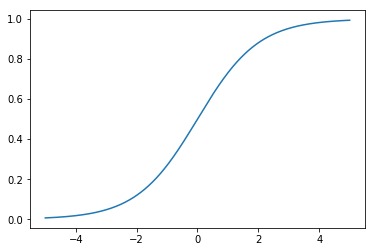

In [7]:
plot_function(sigmoid,-5,5)

In [8]:
def f(x,y):
    return sigmoid(10*x+10*y-10)

TypeError: <lambda>() missing 1 required positional argument: 'z'

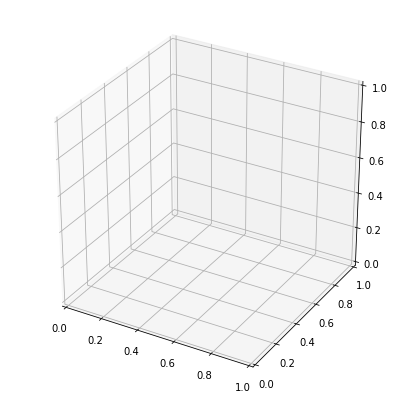

In [9]:
# plot_scalar_field(make_logistic(10,10,-1),0,1,0,1)
def underlying(a,b,c):
    return lambda x,y,z:a*x+b*y+c
plot_scalar_field(underlying(10,10,-10),0,1,0,1)

In [10]:
plot_scalar_field(make_logistic(5,5,-5),0,1,0,1)

NameError: name 'make_logistic' is not defined

In [11]:
plot_decision_boundary(5,5,-5)
plot_decision_boundary(10,10,-10)

NameError: name 'plot_decision_boundary' is not defined

In [12]:
from math import log

def point_cost(model,m,p,actual):
#     if actual == 1:
#         return (1 - model(m,p))**2
#     else:
#         return (model(m,p))**2
    
    if actual == 1:
        return -log(model(m,p))
    elif actual == 0:
        return -log(1 - model(m,p))
    else:
        raise ValueError("acual must be 0 or 1")
        
def make_logistic(a,b,c):
    def f(x,y):
        return sigmoid(a*x + b*y + c)
    return f

def cost(model,data):
    return sum(point_cost(model,m,p,cls) for m,p,cls in data)/len(data)

In [60]:
from random import random
random()
fake_data = []

for i in range(0,50):
    x = random()
    y = random()
    fake_data.append((x,y,x+y>1))
    
def plot_data(ds):
    plt.scatter([d[0] for d in ds if d[2]==1],[d[1] for d in ds if d[2]==1],marker='x')
    plt.scatter([d[0] for d in ds if d[2]==0],[d[1] for d in ds if d[2]==0])
    


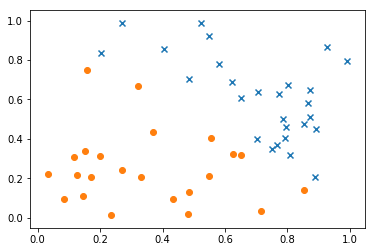

In [61]:
plot_data(fake_data)

In [15]:
cost(make_logistic(1,1,-3.0), fake_data)

1.158597047909034

In [16]:
def plot_decision_boundary(a,b,c):
    if b != 0:
        plt.plot([0,1],[-c/b,-c/b - a / b],c='k')
    else:
        plt.plot([-a/c,-a/c],[0,1],c='k')

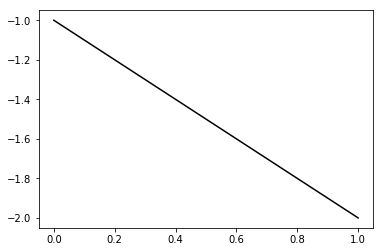

In [17]:
plot_decision_boundary(1,1,1)

In [18]:
from math import sqrt
def length(v):
    return sqrt(sum([x*x for x in v]))

def secant_slope(f,xmin,xmax):
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f,x,dx=1e-6):
    return secant_slope(f,x-dx,x+dx)

def approx_gradient3(f,x0,y0,z0,dx=1e-6):
    partial_x = approx_derivative(lambda x:f(x,y0,z0),x0,dx=dx)
    partial_y = approx_derivative(lambda y:f(x0,y,z0),y0,dx=dx)
    partial_z = approx_derivative(lambda z:f(x0,y0,z),z0,dx=dx)
    return (partial_x,partial_y,partial_z)

def approx_gradient2(f,x0,y0,dx=1e-6):
    partial_x = approx_derivative(lambda x:f(x,y0),x0,dx=dx)
    partial_y = approx_derivative(lambda y:f(x0,y),y0,dx=dx)
    return (partial_x,partial_y)
    
def gradient_descent2(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    grad = approx_gradient2(f,x,y)
    while length(grad) > tolerance:
        x -= 0.1 * grad[0]
        y -= 0.1 * grad[1]
        grad = approx_gradient2(f,x,y)
    return x,y

def gradient_descent3(f,xstart,ystart,zstart,tolerance=1e-6,learning_rate=0.1,max_steps=1000):
    x = xstart
    y = ystart
    z = zstart
    grad = approx_gradient3(f,x,y,z)
    steps = 0
    while length(grad) > tolerance and steps < max_steps:
        x -= learning_rate * grad[0]
        y -= learning_rate * grad[1]
        z -= learning_rate * grad[2]
        grad = approx_gradient3(f,x,y,z)
        print(grad)
        print("x,y,z=(%f,%f,%f), grad=(%f,%f,%f)" % ((x,y,z) + grad), f(x,y,z))
        steps += 1
    return x,y,z

In [19]:
approx_gradient3(lambda x,y,z:x**2 + y**2 + z**2,1,1,1)

(2.0000000001110223, 2.0000000001110223, 2.0000000001110223)

In [32]:
def fake_logistic_cost(a,b,c):
    return cost(make_logistic(a,b,c),fake_data)

In [34]:
gradient_descent3(fake_logistic_cost,1,1,1,max_steps=10000)

(0.07495472869940413, 0.05992630425049923, 0.2605609796738087)
x,y,z=(0.992326,0.993848,0.973606), grad=(0.074955,0.059926,0.260561) 0.7443248669709263
(0.07314966243632855, 0.05831464422288946, 0.2571539083821456)
x,y,z=(0.984831,0.987855,0.947550), grad=(0.073150,0.058315,0.257154) 0.7366704760308953
(0.07132589746400586, 0.05668636465620189, 0.2537175737209779)
x,y,z=(0.977516,0.982024,0.921835), grad=(0.071326,0.056686,0.253718) 0.7292378915703146
(0.06948515784777096, 0.055043001432968745, 0.25025516180834173)
x,y,z=(0.970383,0.976355,0.896463), grad=(0.069485,0.055043,0.250255) 0.7220254861619171
(0.06762921955588513, 0.05338613717611158, 0.24676992976103534)
x,y,z=(0.963435,0.970851,0.871438), grad=(0.067629,0.053386,0.246770) 0.7150313369114317
(0.06575990402024252, 0.05171739408800277, 0.24326519548056783)
x,y,z=(0.956672,0.965512,0.846761), grad=(0.065760,0.051717,0.243265) 0.7082532336992783
(0.0638790674782291, 0.05003842773321661, 0.23974432105532453)
x,y,z=(0.950096,0.960

(-0.029551787602765958, -0.030195427293209644, 0.03174883534113056)
x,y,z=(1.987158,2.102175,-1.514261), grad=(-0.029552,-0.030195,0.031749) 0.4030368334548826
(-0.029524898500707688, -0.030166080490448072, 0.03171580176525314)
x,y,z=(1.990113,2.105195,-1.517436), grad=(-0.029525,-0.030166,0.031716) 0.40275766389599943
(-0.029498049366678304, -0.030136784452634298, 0.03168282994553148)
x,y,z=(1.993066,2.108211,-1.520608), grad=(-0.029498,-0.030137,0.031683) 0.40247903960953507
(-0.029471239978633205, -0.030107539179768314, 0.031649920048499015)
x,y,z=(1.996016,2.111225,-1.523776), grad=(-0.029471,-0.030108,0.031650) 0.402200959128659
(-0.02944447025330567, -0.030078344338783217, 0.03161707151904425)
x,y,z=(1.998963,2.114236,-1.526941), grad=(-0.029444,-0.030078,0.031617) 0.4019234209903298
(-0.029417739989874608, -0.03004920009621246, 0.031584284246144866)
x,y,z=(2.001907,2.117244,-1.530103), grad=(-0.029418,-0.030049,0.031584) 0.4016464237381575
(-0.029391049701010412, -0.030020106424

(-0.02202813503518657, -0.022247910538507575, 0.022943906604745816)
x,y,z=(2.904225,3.032641,-2.482970), grad=(-0.022028,-0.022248,0.022944) 0.32900411893306064
(-0.022012157371552214, -0.022231543464147387, 0.022926039841124173)
x,y,z=(2.906428,3.034866,-2.485264), grad=(-0.022012,-0.022232,0.022926) 0.328853512130499
(-0.021996201662578162, -0.022215200564893553, 0.022908200749811414)
x,y,z=(2.908629,3.037089,-2.487557), grad=(-0.021996,-0.022215,0.022908) 0.32870313032352444
(-0.02198026774173097, -0.02219888197952396, 0.02289038919202966)
x,y,z=(2.910829,3.039311,-2.489848), grad=(-0.021980,-0.022199,0.022890) 0.32855297301365805
(-0.021964355442477178, -0.022182587652527445, 0.022872604917978736)
x,y,z=(2.913027,3.041531,-2.492137), grad=(-0.021964,-0.022183,0.022873) 0.32840303970386553
(-0.021948465070128122, -0.022166317167570386, 0.022854848066436513)
x,y,z=(2.915223,3.043749,-2.494424), grad=(-0.021948,-0.022166,0.022855) 0.32825332989923767
(-0.021932596263861313, -0.0221500

(-0.017145273587361617, -0.017322746817892757, 0.017617648865078023)
x,y,z=(3.658646,3.794272,-3.262886), grad=(-0.017145,-0.017323,0.017618) 0.2835929715210756
(-0.017135485195044074, -0.017312999642604996, 0.01760721576625017)
x,y,z=(3.660361,3.796005,-3.264647), grad=(-0.017135,-0.017313,0.017607) 0.2835025555962833
(-0.017125707904956777, -0.017303263930369968, 0.017596795601520554)
x,y,z=(3.662074,3.797736,-3.266408), grad=(-0.017126,-0.017303,0.017597) 0.28341224369156415
(-0.01711594207792221, -0.01729353987547669, 0.017586388232111293)
x,y,z=(3.663787,3.799466,-3.268168), grad=(-0.017116,-0.017294,0.017586) 0.2833220356233514
(-0.017106187464140186, -0.017283827366902874, 0.01757599379680027)
x,y,z=(3.665498,3.801196,-3.269926), grad=(-0.017106,-0.017284,0.017576) 0.2832319312076884
(-0.017096444146877436, -0.01727412646015966, 0.0175656120457873)
x,y,z=(3.667209,3.802924,-3.271684), grad=(-0.017096,-0.017274,0.017566) 0.28314193026131435
(-0.017086711987356083, -0.017264437044

x,y,z=(4.254218,4.397115,-3.873016), grad=(-0.014075,-0.014277,0.014384) 0.2551120252646969
(-0.014068234658580534, -0.014270883500703584, 0.01437673052627759)
x,y,z=(4.255625,4.398543,-3.874455), grad=(-0.014068,-0.014271,0.014377) 0.25505115673603723
(-0.014061732581926575, -0.014264446843941342, 0.01436995577884882)
x,y,z=(4.257032,4.399970,-3.875892), grad=(-0.014062,-0.014264,0.014370) 0.25499034440137786
(-0.01405523686129943, -0.014258016515450339, 0.0143631878037805)
x,y,z=(4.258438,4.401396,-3.877329), grad=(-0.014055,-0.014258,0.014363) 0.25492958817907607
(-0.014048747607721403, -0.014251592459719423, 0.014356426739850508)
x,y,z=(4.259844,4.402822,-3.878766), grad=(-0.014049,-0.014252,0.014356) 0.2548688879878074
(-0.014042264515881161, -0.014245174565726295, 0.014349672587058842)
x,y,z=(4.261249,4.404247,-3.880201), grad=(-0.014042,-0.014245,0.014350) 0.2548082437460879
(-0.014035787807823311, -0.014238762916737677, 0.014342925206627626)
x,y,z=(4.262653,4.405672,-3.881636),

x,y,z=(4.762843,4.914109,-4.392098), grad=(-0.011931,-0.012151,0.012163) 0.234830575567251
(-0.011926264890658704, -0.012146871964902826, 0.012157902807807054)
x,y,z=(4.764036,4.915324,-4.393314), grad=(-0.011926,-0.012147,0.012158) 0.23478679086721016
(-0.01192170594021996, -0.012142336912014684, 0.012153204427234223)
x,y,z=(4.765228,4.916538,-4.394530), grad=(-0.011922,-0.012142,0.012153) 0.23474303950741698
(-0.01191715069515056, -0.012137805814296066, 0.012148509932441978)
x,y,z=(4.766420,4.917753,-4.395745), grad=(-0.011917,-0.012138,0.012149) 0.23469932144729658
(-0.011912599252595017, -0.012133278213779975, 0.012143819545474924)
x,y,z=(4.767612,4.918966,-4.396960), grad=(-0.011913,-0.012133,0.012144) 0.23465563664635108
(-0.01190805158479776, -0.012128754332511016, 0.012139133196944122)
x,y,z=(4.768803,4.920180,-4.398174), grad=(-0.011908,-0.012129,0.012139) 0.23461198506430267
(-0.011903507830536663, -0.012124234073344675, 0.012134450678682754)
x,y,z=(4.769994,4.921393,-4.39938

(-0.01033394034088858, -0.010556197178791488, 0.010521437816741022)
x,y,z=(5.217617,5.378014,-4.855392), grad=(-0.010334,-0.010556,0.010521) 0.21927823274433808
(-0.010330620010767086, -0.010552863317826884, 0.010518033456614364)
x,y,z=(5.218650,5.379069,-4.856444), grad=(-0.010331,-0.010553,0.010518) 0.21924534558323344
(-0.01032730215089182, -0.01054953178833063, 0.010514631636122873)
x,y,z=(5.219683,5.380125,-4.857496), grad=(-0.010327,-0.010550,0.010515) 0.2192124794780301
(-0.010323986705751633, -0.010546202534791577, 0.010511232244244249)
x,y,z=(5.220716,5.381180,-4.858548), grad=(-0.010324,-0.010546,0.010511) 0.21917963440679433
(-0.010320673522690858, -0.01054287557108751, 0.010507835280978489)
x,y,z=(5.221748,5.382234,-4.859599), grad=(-0.010321,-0.010543,0.010508) 0.21914681034784744
(-0.010317362726609587, -0.010539550924974009, 0.010504440801836748)
x,y,z=(5.222780,5.383289,-4.860650), grad=(-0.010317,-0.010540,0.010504) 0.21911400727967578
(-0.010314054289752241, -0.010536

x,y,z=(5.572647,5.740972,-5.216736), grad=(-0.009268,-0.009481,0.009429) 0.2085708141373092
(-0.009265154850372503, -0.00947839963328552, 0.00942679055517055)
x,y,z=(5.573574,5.741921,-5.217679), grad=(-0.009265,-0.009478,0.009427) 0.2085443482789991
(-0.00926256042569777, -0.00947577102761942, 0.009424135651096559)
x,y,z=(5.574501,5.742868,-5.218622), grad=(-0.009263,-0.009476,0.009424) 0.20851789722482125
(-0.009259967527579696, -0.00947314407341007, 0.009421482481746044)
x,y,z=(5.575427,5.743816,-5.219564), grad=(-0.009260,-0.009473,0.009421) 0.20849146096123722
(-0.009257376322551735, -0.009470518701268532, 0.00941883100548564)
x,y,z=(5.576353,5.744763,-5.220507), grad=(-0.009257,-0.009471,0.009419) 0.20846503947483522
(-0.009254786755102735, -0.009467894897317013, 0.009416181333337654)
x,y,z=(5.577279,5.745710,-5.221449), grad=(-0.009255,-0.009468,0.009416) 0.20843863275216673
(-0.009252198839110482, -0.00946527277257782, 0.009413533173868536)
x,y,z=(5.578204,5.746657,-5.222390), 

(-0.00834657275122681, -0.008543648703978444, 0.00848732571604609)
x,y,z=(5.924242,6.100790,-5.574362), grad=(-0.008347,-0.008544,0.008487) 0.19903876163287726
(-0.008344530953940296, -0.00854156155408138, 0.008485238427371146)
x,y,z=(5.925077,6.101645,-5.575211), grad=(-0.008345,-0.008542,0.008485) 0.1990172948716642
(-0.008342490447288046, -0.008539475667063005, 0.008483152457086045)
x,y,z=(5.925912,6.102499,-5.576059), grad=(-0.008342,-0.008539,0.008483) 0.19899583862476658
(-0.008340451106369974, -0.008537390807000928, 0.008481067569268393)
x,y,z=(5.926746,6.103353,-5.576907), grad=(-0.008340,-0.008537,0.008481) 0.19897439288340046
(-0.00833841284791935, -0.00853530709879524, 0.008478983847184917)
x,y,z=(5.927580,6.104207,-5.577755), grad=(-0.008338,-0.008535,0.008479) 0.1989529576392939
(-0.008336375713569537, -0.008533224486934788, 0.008476901374102343)
x,y,z=(5.928414,6.105060,-5.578603), grad=(-0.008336,-0.008533,0.008477) 0.19893153288407395
(-0.00833433981434284, -0.008531143

(-0.007583060012189876, -0.007760109873048422, 0.007706961776021357)
x,y,z=(6.256617,6.440991,-5.912254), grad=(-0.007583,-0.007760,0.007707) 0.19089034968436538
(-0.007581426554931761, -0.007758426927598991, 0.007705292555704066)
x,y,z=(6.257375,6.441767,-5.913025), grad=(-0.007581,-0.007758,0.007705) 0.19087263966354798
(-0.007579793930340914, -0.007756744856450192, 0.007703624140298468)
x,y,z=(6.258133,6.442543,-5.913795), grad=(-0.007580,-0.007757,0.007704) 0.19085493730275183
(-0.00757816198576167, -0.00775506363184645, 0.0077019565991935015)
x,y,z=(6.258891,6.443318,-5.914566), grad=(-0.007578,-0.007755,0.007702) 0.19083724259648324
(-0.007576530957116421, -0.0077533831705210365, 0.007700289904633592)
x,y,z=(6.259649,6.444094,-5.915336), grad=(-0.007577,-0.007753,0.007700) 0.19081955553933658
(-0.007574900775016229, -0.00775170355574068, 0.00769862404274095)
x,y,z=(6.260407,6.444869,-5.916106), grad=(-0.007575,-0.007752,0.007699) 0.19080187612581667
(-0.007573271342316577, -0.007

(-0.007058857566923132, -0.0072186456524416425, 0.007171348916476107)
x,y,z=(6.511888,6.702141,-6.171645), grad=(-0.007059,-0.007219,0.007171) 0.1851392819590721
(-0.007057476962958839, -0.0072172159072307306, 0.0071699383781235184)
x,y,z=(6.512594,6.702862,-6.172362), grad=(-0.007057,-0.007217,0.007170) 0.18512394701217505
(-0.007056096983494999, -0.0072157868281536326, 0.007168528492026956)
x,y,z=(6.513300,6.703584,-6.173079), grad=(-0.007056,-0.007216,0.007169) 0.18510861810005333
(-0.00705471762853161, -0.007214358318065835, 0.007167119313697572)
x,y,z=(6.514005,6.704306,-6.173796), grad=(-0.007055,-0.007214,0.007167) 0.18509329521875298
(-0.007053338939702035, -0.007212930446356276, 0.00716571081537979)
x,y,z=(6.514711,6.705027,-6.174513), grad=(-0.007053,-0.007213,0.007166) 0.1850779783643534
(-0.007051960847617336, -0.007211503240780532, 0.007164302844417945)
x,y,z=(6.515416,6.705748,-6.175229), grad=(-0.007052,-0.007212,0.007164) 0.18506266753287662
(-0.007050583449422027, -0.0

(-0.006556530442652394, -0.006697232947835211, 0.006658197214861303)
x,y,z=(6.781888,6.978103,-6.445890), grad=(-0.006557,-0.006697,0.006658) 0.17948818888380028
(-0.00655537110613688, -0.0066960268986859415, 0.006657013037105615)
x,y,z=(6.782544,6.978773,-6.446556), grad=(-0.006555,-0.006696,0.006657) 0.17947497280088429
(-0.0065542122969773015, -0.006694821349137033, 0.006655829428339228)
x,y,z=(6.783200,6.979443,-6.447222), grad=(-0.006554,-0.006695,0.006656) 0.17946176142940717
(-0.006553053945784721, -0.006693616285310697, 0.006654646319173202)
x,y,z=(6.783855,6.980112,-6.447887), grad=(-0.006553,-0.006694,0.006655) 0.17944855476648894
(-0.006551896121948076, -0.006692411707206936, 0.0066534635985852335)
x,y,z=(6.784510,6.980781,-6.448553), grad=(-0.006552,-0.006692,0.006653) 0.1794353528093518
(-0.006550738700567279, -0.006691207587070171, 0.0066522814192309905)
x,y,z=(6.785165,6.981451,-6.449218), grad=(-0.006551,-0.006691,0.006652) 0.17942215555524832
(-0.006549581875931357, -0

x,y,z=(7.037221,7.238737,-6.705130), grad=(-0.006126,-0.006248,0.006218) 0.17451569444015935
(-0.006124651604465405, -0.00624715501464199, 0.0062171226769183845)
x,y,z=(7.037834,7.239362,-6.705752), grad=(-0.006125,-0.006247,0.006217) 0.17450417253940767
(-0.006123666156631098, -0.006246126309743092, 0.0062161163152578535)
x,y,z=(7.038446,7.239986,-6.706374), grad=(-0.006124,-0.006246,0.006216) 0.17449265438366182
(-0.006122680972474758, -0.006245097924033313, 0.006215110342175381)
x,y,z=(7.039059,7.240611,-6.706996), grad=(-0.006123,-0.006245,0.006215) 0.17448113997087433
(-0.006121696232407629, -0.006244069954657168, 0.006214104785426543)
x,y,z=(7.039671,7.241235,-6.707617), grad=(-0.006122,-0.006244,0.006214) 0.17446962929911877
(-0.006120711839285195, -0.006243042415492446, 0.006213099603377976)
x,y,z=(7.040283,7.241860,-6.708238), grad=(-0.006121,-0.006243,0.006213) 0.17445812236628125
(-0.006119727945763122, -0.006242015237150206, 0.006212094879296406)
x,y,z=(7.040895,7.242484,-6

(-0.005788451814282812, -0.005895811199538539, 0.005873863825068244)
x,y,z=(7.255126,7.460846,-6.926288), grad=(-0.005788,-0.005896,0.005874) 0.17053333890093078
(-0.0057875910861275165, -0.005894910753154543, 0.005872985166811103)
x,y,z=(7.255705,7.461435,-6.926876), grad=(-0.005788,-0.005895,0.005873) 0.17052306276952478
(-0.00578673067716134, -0.005894010695348605, 0.005872106883254232)
x,y,z=(7.256284,7.462025,-6.927463), grad=(-0.005787,-0.005894,0.005872) 0.17051278972788084
(-0.00578587067065101, -0.005893110915098423, 0.005871228877253118)
x,y,z=(7.256862,7.462614,-6.928050), grad=(-0.005786,-0.005893,0.005871) 0.17050251977435033
(-0.005785010872307497, -0.005892211454037361, 0.005870351287585638)
x,y,z=(7.257441,7.463204,-6.928637), grad=(-0.005785,-0.005892,0.005870) 0.1704922529073601
(-0.00578415147641983, -0.00589131236767657, 0.0058694738783294)
x,y,z=(7.258020,7.463793,-6.929224), grad=(-0.005784,-0.005891,0.005869) 0.1704819891253441
(-0.0057832922609434055, -0.0058904

x,y,z=(7.488843,7.698698,-7.163412), grad=(-0.005455,-0.005547,0.005534) 0.16650778666519855
(-0.005454350248471954, -0.0055459811735289535, 0.005532863930128204)
x,y,z=(7.489389,7.699252,-7.163965), grad=(-0.005454,-0.005546,0.005533) 0.16649867273021082
(-0.005453604553299781, -0.005545199729175393, 0.005532102913878294)
x,y,z=(7.489934,7.699807,-7.164518), grad=(-0.005454,-0.005545,0.005532) 0.16648956131810608
(-0.005452859107927788, -0.005544418576255376, 0.00553134235559538)
x,y,z=(7.490480,7.700362,-7.165072), grad=(-0.005453,-0.005544,0.005531) 0.16648045242781243
(-0.005452113995622703, -0.005543637700891115, 0.005530581838945831)
x,y,z=(7.491025,7.700916,-7.165625), grad=(-0.005452,-0.005544,0.005531) 0.16647134605801392
(-0.005451368980462132, -0.005542857061449247, 0.005529821696996552)
x,y,z=(7.491570,7.701470,-7.166178), grad=(-0.005451,-0.005543,0.005530) 0.1664622422075876
(-0.005450624256735106, -0.005542076630174196, 0.005529061790969666)
x,y,z=(7.492115,7.702025,-7.1

(-0.005164034213411654, -0.005241592104066139, 0.005236673302589588)
x,y,z=(7.710132,7.923510,-7.387850), grad=(-0.005164,-0.005242,0.005237) 0.16291281557793102
(-0.0051633812496176, -0.005240907096460041, 0.005236007252041633)
x,y,z=(7.710649,7.924034,-7.388373), grad=(-0.005163,-0.005241,0.005236) 0.1629046596720213
(-0.005162728438479212, -0.005240222394165274, 0.0052353413680271315)
x,y,z=(7.711165,7.924558,-7.388897), grad=(-0.005163,-0.005240,0.005235) 0.16289650585584314
(-0.005162075807752065, -0.005239537761259448, 0.005234675678301659)
x,y,z=(7.711681,7.925082,-7.389420), grad=(-0.005162,-0.005240,0.005235) 0.1628883541284817
(-0.005161423412947311, -0.005238853433664952, 0.005234010182865216)
x,y,z=(7.712197,7.925606,-7.389944), grad=(-0.005161,-0.005239,0.005234) 0.1628802044891174
(-0.0051607711707982225, -0.005238169328115061, 0.00523334496498453)
x,y,z=(7.712714,7.926130,-7.390467), grad=(-0.005161,-0.005238,0.005233) 0.16287205693677836
(-0.005160119164571527, -0.00523

x,y,z=(7.901838,8.117940,-7.582225), grad=(-0.004930,-0.004996,0.004998) 0.15995624183587173
(-0.004928956950233588, -0.004994943698507601, 0.004996937529723057)
x,y,z=(7.902331,8.118440,-7.582725), grad=(-0.004929,-0.004995,0.004997) 0.15994881915437312
(-0.00492837402763459, -0.00499433199337615, 0.004996343268971422)
x,y,z=(7.902823,8.118939,-7.583225), grad=(-0.004928,-0.004994,0.004996) 0.15994139825289916
(-0.004927791313202409, -0.004993720551922668, 0.004995749119242089)
x,y,z=(7.903316,8.119439,-7.583724), grad=(-0.004928,-0.004994,0.004996) 0.15993397913073054
(-0.0049272088208148325, -0.004993109193735913, 0.004995155219312937)
x,y,z=(7.903809,8.119938,-7.584224), grad=(-0.004927,-0.004993,0.004995) 0.15992656178710699
(-0.004926626467205135, -0.004992498071471551, 0.004994561430406086)
x,y,z=(7.904302,8.120437,-7.584724), grad=(-0.004927,-0.004992,0.004995) 0.15991914622128214
(-0.0049260442940066785, -0.0049918871018628545, 0.0049939678080326904)
x,y,z=(7.904794,8.120937,-

x,y,z=(8.103006,8.321626,-7.786141), grad=(-0.004700,-0.004754,0.004763) 0.1570003818189213
(-0.004699149517470517, -0.00475375789089017, 0.0047626741155330785)
x,y,z=(8.103476,8.322102,-7.786617), grad=(-0.004699,-0.004754,0.004763) 0.1569936443590454
(-0.004698631057195417, -0.004753213715074242, 0.0047621457326401575)
x,y,z=(8.103946,8.322577,-7.787093), grad=(-0.004699,-0.004753,0.004762) 0.1569869084075439
(-0.004698112721820406, -0.004752669622525042, 0.004761617474647327)
x,y,z=(8.104416,8.323052,-7.787569), grad=(-0.004698,-0.004753,0.004762) 0.15698017396378053
(-0.004697594539101063, -0.00475212579365381, 0.0047610893276767985)
x,y,z=(8.104885,8.323528,-7.788045), grad=(-0.004698,-0.004752,0.004761) 0.15697344102722394
(-0.004697076467404021, -0.004751582061927093, 0.004760561361117512)
x,y,z=(8.105355,8.324003,-7.788522), grad=(-0.004697,-0.004752,0.004761) 0.15696670959725112
(-0.0046965585206070705, -0.004751038524489405, 0.004760033463947164)
x,y,z=(8.105825,8.324478,-7.7

x,y,z=(8.272563,8.493026,-7.957971), grad=(-0.004518,-0.004563,0.004578) 0.15461830697257825
(-0.00451737955713978, -0.0045629964701986575, 0.004577455608360753)
x,y,z=(8.273015,8.493482,-7.958429), grad=(-0.004517,-0.004563,0.004577) 0.1546120879111086
(-0.004516909030743804, -0.004562502767897025, 0.004576976297325513)
x,y,z=(8.273467,8.493939,-7.958887), grad=(-0.004517,-0.004563,0.004577) 0.15460587016427355
(-0.004516438670881281, -0.004562009259884422, 0.0045764971250681526)
x,y,z=(8.273918,8.494395,-7.959345), grad=(-0.004516,-0.004562,0.004576) 0.1545996537316824
(-0.004515968491430001, -0.004561515793505182, 0.00457601802219973)
x,y,z=(8.274370,8.494851,-7.959802), grad=(-0.004516,-0.004562,0.004576) 0.1545934386127996
(-0.004515498339734296, -0.004561022438148245, 0.004575539113620337)
x,y,z=(8.274822,8.495307,-7.960260), grad=(-0.004515,-0.004561,0.004576) 0.1545872248071848
(-0.004515028368449833, -0.0045605292909581254, 0.0045750603160632465)
x,y,z=(8.275273,8.495763,-7.96

x,y,z=(8.460912,8.683117,-8.148803), grad=(-0.004328,-0.004364,0.004384) 0.15208219628509403
(-0.004327325695460179, -0.004363601830361109, 0.004383873989327786)
x,y,z=(8.461345,8.683553,-8.149242), grad=(-0.004327,-0.004364,0.004384) 0.15207649692470884
(-0.004326902686609692, -0.004363158185240136, 0.004383443195038334)
x,y,z=(8.461778,8.683990,-8.149680), grad=(-0.004327,-0.004363,0.004383) 0.15207079869550985
(-0.004326479816537084, -0.004362714595630315, 0.004383012581160123)
x,y,z=(8.462210,8.684426,-8.150118), grad=(-0.004326,-0.004363,0.004383) 0.15206510159713227
(-0.004326056946464475, -0.0043622711170427965, 0.0043825819672819125)
x,y,z=(8.462643,8.684862,-8.150557), grad=(-0.004326,-0.004362,0.004383) 0.152059405629163
(-0.004325634326192047, -0.004361827763355369, 0.004382151561570518)
x,y,z=(8.463075,8.685299,-8.150995), grad=(-0.004326,-0.004362,0.004382) 0.15205371079130406
(-0.00432521170591962, -0.004361384534568031, 0.004381721280759215)
x,y,z=(8.463508,8.685735,-8.1

x,y,z=(8.633666,8.857183,-8.323797), grad=(-0.004164,-0.004192,0.004217) 0.1498518938493417
(-0.004163234524130957, -0.004191535816017734, 0.004216804908410748)
x,y,z=(8.634082,8.857603,-8.324219), grad=(-0.004163,-0.004192,0.004217) 0.14984662481479658
(-0.004162850289819635, -0.004191133054859674, 0.0042164138184722436)
x,y,z=(8.634499,8.858022,-8.324641), grad=(-0.004163,-0.004191,0.004216) 0.14984135676785862
(-0.004162466166530615, -0.004190730363090553, 0.004216022811800466)
x,y,z=(8.634915,8.858441,-8.325062), grad=(-0.004162,-0.004191,0.004216) 0.14983608970819862
(-0.00416208214038611, -0.004190327810099311, 0.004215631874517627)
x,y,z=(8.635331,8.858860,-8.325484), grad=(-0.004162,-0.004190,0.004216) 0.14983082363549985
(-0.004161698169752756, -0.004189925326497007, 0.004215241020501515)
x,y,z=(8.635747,8.859279,-8.325906), grad=(-0.004162,-0.004190,0.004215) 0.1498255585494279
(-0.004161314296263916, -0.004189522953917006, 0.004214850263629918)
x,y,z=(8.636164,8.859698,-8.32

(-0.004005081269631085, -0.004025810701706374, 0.004055843927635074)
x,y,z=(8.810471,9.035047,-8.502860), grad=(-0.004005,-0.004026,0.004056) 0.14765866188897978
(-0.0040047324791898506, -0.004025445355064271, 0.004055489058722774)
x,y,z=(8.810871,9.035450,-8.503266), grad=(-0.004005,-0.004025,0.004055) 0.14765379233453613
(-0.004004383744259767, -0.004025080174955623, 0.004055134245321626)
x,y,z=(8.811272,9.035852,-8.503671), grad=(-0.004004,-0.004025,0.004055) 0.1476489236413938
(-0.004004035175863138, -0.004024714939335824, 0.004054779473553842)
x,y,z=(8.811672,9.036255,-8.504077), grad=(-0.004004,-0.004025,0.004055) 0.14764405580927048
(-0.004003686621344296, -0.004024349939638417, 0.004054424868319511)
x,y,z=(8.812073,9.036657,-8.504482), grad=(-0.004004,-0.004024,0.004054) 0.1476391888379344
(-0.004003338177847756, -0.004023984898307647, 0.004054070235329605)
x,y,z=(8.812473,9.037060,-8.504888), grad=(-0.004003,-0.004024,0.004054) 0.14763432272704732
(-0.004002989789862368, -0.00

x,y,z=(8.967969,9.193247,-8.662341), grad=(-0.003871,-0.003886,0.003920) 0.14577688195678357
(-0.0038710620293807892, -0.003885488447784807, 0.003919494842732494)
x,y,z=(8.968356,9.193635,-8.662733), grad=(-0.003871,-0.003885,0.003919) 0.1457723369257473
(-0.0038707417855490967, -0.0038851532853312097, 0.003919169172685764)
x,y,z=(8.968743,9.194024,-8.663125), grad=(-0.003871,-0.003885,0.003919) 0.14576779265851242
(-0.003870421666617494, -0.003884818289411066, 0.003918843516516822)
x,y,z=(8.969130,9.194412,-8.663517), grad=(-0.003870,-0.003885,0.003919) 0.14576324915486413
(-0.003870101617074831, -0.0038844832102241955, 0.0039185178603478804)
x,y,z=(8.969517,9.194801,-8.663909), grad=(-0.003870,-0.003884,0.003919) 0.14575870641454008
(-0.0038697815952877432, -0.0038841483808375057, 0.003918192412345756)
x,y,z=(8.969904,9.195189,-8.664301), grad=(-0.003870,-0.003884,0.003918) 0.14575416443740175
(-0.0038694616428895947, -0.0038838135236952407, 0.003917866992099207)
x,y,z=(8.970291,9.19

(-0.003748374391462113, -0.0037571413508493533, 0.003794714989522346)
x,y,z=(9.120337,9.346077,-8.816604), grad=(-0.003748,-0.003757,0.003795) 0.14401754260780916
(-0.0037480791554040686, -0.003756832597825974, 0.003794414757460687)
x,y,z=(9.120712,9.346453,-8.816984), grad=(-0.003748,-0.003757,0.003794) 0.14401328614975523
(-0.003747783988734963, -0.003756523983580473, 0.003794114594787967)
x,y,z=(9.121086,9.346829,-8.817363), grad=(-0.003748,-0.003757,0.003794) 0.1440090303727948
(-0.0037474888359436457, -0.003756215424846123, 0.0037938145015041862)
x,y,z=(9.121461,9.347204,-8.817743), grad=(-0.003747,-0.003756,0.003794) 0.14400477527670094
(-0.003747193780296843, -0.0037559068522339855, 0.0037935144776093444)
x,y,z=(9.121836,9.347580,-8.818122), grad=(-0.003747,-0.003756,0.003794) 0.14400052086129866
(-0.0037468987940389793, -0.003755598404521938, 0.003793214495347866)
x,y,z=(9.122211,9.347956,-8.818501), grad=(-0.003747,-0.003756,0.003793) 0.14399626712640784
(-0.003746603904925630

x,y,z=(9.273425,9.499418,-8.971575), grad=(-0.003631,-0.003634,0.003675) 0.14230745081927315
(-0.0036304254074606876, -0.003633867695584478, 0.003674791473870147)
x,y,z=(9.273788,9.499781,-8.971942), grad=(-0.003630,-0.003634,0.003675) 0.1423034614557789
(-0.00363015315301927, -0.0036335832842009316, 0.0036745147091476887)
x,y,z=(9.274152,9.500145,-8.972310), grad=(-0.003630,-0.003634,0.003675) 0.14229947270018303
(-0.0036298809263334286, -0.0036332989144507487, 0.0036742379999363814)
x,y,z=(9.274515,9.500508,-8.972677), grad=(-0.003630,-0.003633,0.003674) 0.14229548455232
(-0.0036296087967921014, -0.0036330145863339293, 0.0036739613739918014)
x,y,z=(9.274878,9.500871,-8.973045), grad=(-0.003630,-0.003633,0.003674) 0.14229149701203986
(-0.0036293367088841375, -0.003632730341483837, 0.0036736847341694336)
x,y,z=(9.275240,9.501235,-8.973412), grad=(-0.003629,-0.003633,0.003674) 0.14228751007915708
(-0.003629064634853962, -0.003632446207656047, 0.00367340819149158)
x,y,z=(9.275603,9.50159

x,y,z=(9.399226,9.625268,-9.098906), grad=(-0.003538,-0.003538,0.003581) 0.14094339837352204
(-0.0035379408734713936, -0.0035372980543396547, 0.003580784199612501)
x,y,z=(9.399580,9.625621,-9.099264), grad=(-0.003538,-0.003537,0.003581) 0.14093961280589512
(-0.0035376859107535976, -0.003537031933880453, 0.0035805250458027836)
x,y,z=(9.399934,9.625975,-9.099622), grad=(-0.003538,-0.003537,0.003581) 0.14093582779258712
(-0.003537430975791377, -0.0035367659244435537, 0.0035802659891375813)
x,y,z=(9.400288,9.626329,-9.099980), grad=(-0.003537,-0.003537,0.003580) 0.14093204333348186
(-0.0035371761240958837, -0.003536499901128866, 0.003580006946350167)
x,y,z=(9.400641,9.626682,-9.100338), grad=(-0.003537,-0.003536,0.003580) 0.14092825942840342
(-0.003536921314033754, -0.0035362339472031186, 0.0035797479729516913)
x,y,z=(9.400995,9.627036,-9.100696), grad=(-0.003537,-0.003536,0.003580) 0.14092447607723085
(-0.0035366665456049873, -0.003535968048788522, 0.0035794890411865797)
x,y,z=(9.401349,9

(9.444660179251597, 9.670684156878572, -9.14488917662076)

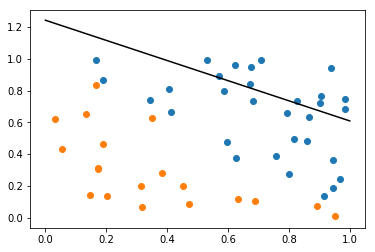

In [22]:
plot_data(fake_data)
plot_decision_boundary(0.9533081887792116, 1.5020054709153483, -1.8676211124364732)

<Figure size 504x504 with 0 Axes>

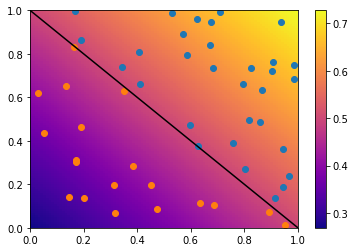

In [23]:
# x + y = 1

scalar_field_heatmap(make_logistic(1,1,-1),0,1,0,1)
plot_decision_boundary(1,1,-1)
plot_data(fake_data)

In [24]:
gradient_descent3(logistic_cost,1,1,-1,max_steps=10000, learning_rate=1e-1)

(-0.11481090984422893, -0.11128428413025979, -0.09096026392945607)
x,y,z=(1.011810,1.011429,-0.990371), grad=(-0.114811,-0.111284,-0.090960) 0.5311465399918689
(-0.11166647529789397, -0.10840639992130455, -0.08585551902504238)
x,y,z=(1.023291,1.022558,-0.981275), grad=(-0.111666,-0.108406,-0.085856) 0.5278199087946469
(-0.10865638084617418, -0.10565180464697645, -0.08096670139668183)
x,y,z=(1.034457,1.033398,-0.972689), grad=(-0.108656,-0.105652,-0.080967) 0.5247134174372787
(-0.1057746226249965, -0.10301492970613926, -0.07628455084065974)
x,y,z=(1.045323,1.043963,-0.964593), grad=(-0.105775,-0.103015,-0.076285) 0.5218095805771261
(-0.10301541082128703, -0.10049040894682533, -0.07180011079925866)
x,y,z=(1.055900,1.054265,-0.956964), grad=(-0.103015,-0.100490,-0.071800) 0.5190923455396077
(-0.10037317511306384, -0.09807308505001792, -0.06750473879685479)
x,y,z=(1.066202,1.064314,-0.949784), grad=(-0.100373,-0.098073,-0.067505) 0.5165469761619166
(-0.09784256738948344, -0.095758010972941

x,y,z=(2.530702,2.607349,-2.068744), grad=(-0.024637,-0.025855,0.026392) 0.35812554724234114
(-0.02461796172126338, -0.025832692092939306, 0.02636888845795064)
x,y,z=(2.533165,2.609934,-2.071383), grad=(-0.024618,-0.025833,0.026369) 0.35792842770118505
(-0.024598586275573785, -0.02581054161704447, 0.026345459143909494)
x,y,z=(2.535627,2.612517,-2.074020), grad=(-0.024599,-0.025811,0.026345) 0.35773164203118296
(-0.02457923839117077, -0.025788427528709263, 0.02632206954809705)
x,y,z=(2.538087,2.615098,-2.076655), grad=(-0.024579,-0.025788,0.026322) 0.3575351894150813
(-0.024559917957032038, -0.025766349633644655, 0.026298719476224273)
x,y,z=(2.540545,2.617677,-2.079287), grad=(-0.024560,-0.025766,0.026299) 0.3573390690384549
(-0.02454062486213528, -0.025744308126139672, 0.02627540876175772)
x,y,z=(2.543001,2.620254,-2.081917), grad=(-0.024541,-0.025744,0.026275) 0.3571432800900675
(-0.024521359384036257, -0.025722302617616256, 0.026252137598986407)
x,y,z=(2.545455,2.622828,-2.084544), g

(-0.01926079240274775, -0.0198874882090207, 0.02012203825504002)
x,y,z=(3.287566,3.394517,-2.868668), grad=(-0.019261,-0.019887,0.020122) 0.3051923066435975
(-0.019248595631378804, -0.019874342335743703, 0.020108311735121228)
x,y,z=(3.289492,3.396506,-2.870681), grad=(-0.019249,-0.019874,0.020108) 0.3050752066026838
(-0.01923641379250953, -0.019861214448079707, 0.02009460436654961)
x,y,z=(3.291417,3.398493,-2.872691), grad=(-0.019236,-0.019861,0.020095) 0.30495826094637335
(-0.019224247274718, -0.019848104490517555, 0.02008091598279171)
x,y,z=(3.293341,3.400480,-2.874701), grad=(-0.019224,-0.019848,0.020081) 0.3048414693668887
(-0.019212095633914995, -0.019835012324279373, 0.02006724663935868)
x,y,z=(3.295263,3.402464,-2.876709), grad=(-0.019212,-0.019835,0.020067) 0.3047248315567516
(-0.01919995917541185, -0.019821938088143035, 0.02005359628073937)
x,y,z=(3.297184,3.404448,-2.878716), grad=(-0.019200,-0.019822,0.020054) 0.30460834721009955
(-0.01918783753838608, -0.01980888153230836, 

(-0.015302694442801832, -0.015700691605750352, 0.015769693021433034)
x,y,z=(3.986636,4.113634,-3.593568), grad=(-0.015303,-0.015701,0.015770) 0.2674951535180457
(-0.015295017972232589, -0.015692708630359625, 0.01576143565442181)
x,y,z=(3.988166,4.115204,-3.595145), grad=(-0.015295,-0.015693,0.015761) 0.26742223543192745
(-0.015287349300980092, -0.015684734175930613, 0.015753187502261692)
x,y,z=(3.989696,4.116774,-3.596721), grad=(-0.015287,-0.015685,0.015753) 0.26734939190226387
(-0.015279688789866824, -0.01567676846450792, 0.015744948564952673)
x,y,z=(3.991224,4.118342,-3.598297), grad=(-0.015280,-0.015677,0.015745) 0.267276622810823
(-0.015272036078070305, -0.01566881146833597, 0.015736718759228035)
x,y,z=(3.992752,4.119910,-3.599871), grad=(-0.015272,-0.015669,0.015737) 0.2672039280386604
(-0.01526439135987956, -0.01566086304863688, 0.015728498140598922)
x,y,z=(3.994279,4.121477,-3.601445), grad=(-0.015264,-0.015661,0.015728) 0.26713130746774333
(-0.015256754496516714, -0.0156529234

x,y,z=(4.557575,4.698971,-4.179900), grad=(-0.012710,-0.013026,0.013015) 0.24273575339906006
(-0.01270519690665984, -0.013020848869516781, 0.013009766262464039)
x,y,z=(4.558847,4.700274,-4.181202), grad=(-0.012705,-0.013021,0.013010) 0.2426857005973855
(-0.012700008154454889, -0.013015529235895034, 0.01300431559476983)
x,y,z=(4.560117,4.701576,-4.182503), grad=(-0.012700,-0.013016,0.013004) 0.24263568904813776
(-0.012694823926408761, -0.01301021444562123, 0.012998869756545774)
x,y,z=(4.561387,4.702877,-4.183803), grad=(-0.012695,-0.013010,0.012999) 0.24258571869739268
(-0.012689644264154825, -0.013004904276650766, 0.012993428997592057)
x,y,z=(4.562657,4.704178,-4.185103), grad=(-0.012690,-0.013005,0.012993) 0.2425357894914198
(-0.012684469153815287, -0.012999599034294974, 0.012987993193008586)
x,y,z=(4.563925,4.705479,-4.186403), grad=(-0.012684,-0.013000,0.012988) 0.2424859013764705
(-0.012679298553756786, -0.012994298371609156, 0.012982562426062088)
x,y,z=(4.565194,4.706779,-4.187701

(-0.010883992913745751, -0.01115736598788528, 0.011109117971199015)
x,y,z=(5.046294,5.199879,-4.679470), grad=(-0.010884,-0.011157,0.011109) 0.22493073680831696
(-0.010880287502768218, -0.011153577504469943, 0.011105273907243515)
x,y,z=(5.047383,5.200994,-4.680581), grad=(-0.010880,-0.011154,0.011105) 0.22489410701197068
(-0.010876584714692583, -0.011149791866001105, 0.011101432743745665)
x,y,z=(5.048471,5.202110,-4.681691), grad=(-0.010877,-0.011150,0.011101) 0.22485750226519852
(-0.010872884924219112, -0.01114600904472319, 0.011097594577849984)
x,y,z=(5.049558,5.203225,-4.682802), grad=(-0.010873,-0.011146,0.011098) 0.2248209225407034
(-0.010869187728891961, -0.011142229068391778, 0.011093759340167528)
x,y,z=(5.050645,5.204339,-4.683911), grad=(-0.010869,-0.011142,0.011094) 0.2247843678107342
(-0.010865493281366795, -0.011138451923129077, 0.0110899271417206)
x,y,z=(5.051732,5.205454,-4.685021), grad=(-0.010865,-0.011138,0.011090) 0.2247478380480535
(-0.010861801817566009, -0.01113467

(-0.00956202142332178, -0.009804470095537542, 0.009742442934361127)
x,y,z=(5.466237,5.630431,-5.107695), grad=(-0.009562,-0.009804,0.009742) 0.21168350520424423
(-0.009559245796371666, -0.009801624926992733, 0.009739582361471853)
x,y,z=(5.467193,5.631411,-5.108669), grad=(-0.009559,-0.009802,0.009740) 0.21165526181156108
(-0.009556471904145028, -0.009798781493171399, 0.00973672374535066)
x,y,z=(5.468149,5.632391,-5.109643), grad=(-0.009556,-0.009799,0.009737) 0.2116270348736056
(-0.009553699954808682, -0.009795939918973632, 0.009733866988853033)
x,y,z=(5.469105,5.633371,-5.110616), grad=(-0.009554,-0.009796,0.009734) 0.21159882437493457
(-0.009550929795706964, -0.009793100232155006, 0.00973101223075685)
x,y,z=(5.470060,5.634351,-5.111590), grad=(-0.009551,-0.009793,0.009731) 0.21157063029989298
(-0.009548161454595448, -0.00979026232169322, 0.009728159262895294)
x,y,z=(5.471016,5.635330,-5.112563), grad=(-0.009548,-0.009790,0.009728) 0.21154245263282348
(-0.009545394848207408, -0.009787

x,y,z=(5.774697,5.946699,-5.421819), grad=(-0.008717,-0.008937,0.008873) 0.20298474107256215
(-0.008714881592933642, -0.008934597088700176, 0.008870790892271564)
x,y,z=(5.775569,5.947593,-5.422706), grad=(-0.008715,-0.008935,0.008871) 0.20296128524195356
(-0.008712633280286788, -0.008932283883517543, 0.008868480934491276)
x,y,z=(5.776440,5.948486,-5.423593), grad=(-0.008713,-0.008932,0.008868) 0.202937841567962
(-0.00871038631378535, -0.00892997212162484, 0.008866172378367556)
x,y,z=(5.777312,5.949380,-5.424480), grad=(-0.008710,-0.008930,0.008866) 0.20291441004030328
(-0.008708140679551543, -0.0089276615393441, 0.008863865154511466)
x,y,z=(5.778183,5.950273,-5.425367), grad=(-0.008708,-0.008928,0.008864) 0.20289099064855556
(-0.008705896335952002, -0.00892535235871993, 0.008861559332311943)
x,y,z=(5.779054,5.951165,-5.426253), grad=(-0.008706,-0.008925,0.008862) 0.20286758338261443
(-0.008703653255231151, -0.008923044510363388, 0.008859254870135627)
x,y,z=(5.779924,5.952058,-5.427139)

x,y,z=(6.116205,6.296726,-5.769284), grad=(-0.007891,-0.008084,0.008025) 0.19424359274280903
(-0.007888741936364687, -0.008082642373710579, 0.008022997071133074)
x,y,z=(6.116994,6.297534,-5.770087), grad=(-0.007889,-0.008083,0.008023) 0.1942243931944723
(-0.007886954518928653, -0.008080794490753076, 0.008021164634153399)
x,y,z=(6.117783,6.298342,-5.770889), grad=(-0.007887,-0.008081,0.008021) 0.19420520239756786
(-0.007885167934159889, -0.008078947482096204, 0.008019333279641171)
x,y,z=(6.118572,6.299150,-5.771691), grad=(-0.007885,-0.008079,0.008019) 0.19418602034560506
(-0.007883382348591846, -0.008077101528151205, 0.008017502827185153)
x,y,z=(6.119361,6.299958,-5.772493), grad=(-0.007883,-0.008077,0.008018) 0.1941668470320755
(-0.007881597678957797, -0.008075256462384627, 0.008015673373929855)
x,y,z=(6.120149,6.300766,-5.773295), grad=(-0.007882,-0.008075,0.008016) 0.1941476824503434
(-0.007879813925257745, -0.008073412354185407, 0.008013844933753067)
x,y,z=(6.120937,6.301573,-5.774

x,y,z=(6.433657,6.621822,-6.092027), grad=(-0.007212,-0.007382,0.007330) 0.1868610521938599
(-0.0072109344596473085, -0.007380363250065532, 0.007328663203051495)
x,y,z=(6.434378,6.622560,-6.092760), grad=(-0.007211,-0.007380,0.007329) 0.18684502966116434
(-0.007209484994099924, -0.007378857898666653, 0.007327179237323625)
x,y,z=(6.435100,6.623298,-6.093493), grad=(-0.007209,-0.007379,0.007327) 0.18682901361889662
(-0.0072080360142751125, -0.007377353255034952, 0.007325695909973994)
x,y,z=(6.435821,6.624036,-6.094226), grad=(-0.007208,-0.007377,0.007326) 0.1868130040624795
(-0.007206587769973055, -0.007375849360803793, 0.007324213415291631)
x,y,z=(6.436541,6.624774,-6.094958), grad=(-0.007207,-0.007376,0.007324) 0.18679700098773927
(-0.0072051402334381755, -0.007374346104950873, 0.007322731586743084)
x,y,z=(6.437262,6.625512,-6.095691), grad=(-0.007205,-0.007374,0.007323) 0.18678100439015263
(-0.007203693307525959, -0.007372843542987343, 0.007321250410450562)
x,y,z=(6.437983,6.626249,-6

(-0.0066748232487419505, -0.006822652566952384, 0.006780100702148828)
x,y,z=(6.715263,6.909863,-6.378151), grad=(-0.006675,-0.006823,0.006780) 0.18084535870543422
(-0.006673614840368754, -0.006821393268731303, 0.0067788647324890485)
x,y,z=(6.715930,6.910546,-6.378829), grad=(-0.006674,-0.006821,0.006779) 0.18083165279546068
(-0.006672406945473706, -0.0068201344701105835, 0.006777629262429631)
x,y,z=(6.716598,6.911228,-6.379507), grad=(-0.006672,-0.006820,0.006778) 0.18081795189179156
(-0.006671199536301232, -0.0068188762266013754, 0.006776394514015179)
x,y,z=(6.717265,6.911910,-6.380185), grad=(-0.006671,-0.006819,0.006776) 0.18080425599142394
(-0.0066699927099958456, -0.006817618524325893, 0.006775160168056573)
x,y,z=(6.717932,6.912592,-6.380863), grad=(-0.006670,-0.006818,0.006775) 0.18079056509118677
(-0.006668786369413032, -0.006816361377161922, 0.0067739263633316915)
x,y,z=(6.718599,6.913273,-6.381540), grad=(-0.006669,-0.006816,0.006774) 0.18077687918807192
(-0.006667580500675003

x,y,z=(6.984324,7.184675,-6.651390), grad=(-0.006211,-0.006339,0.006306) 0.1755187139878909
(-0.0062100354849749535, -0.006337594420593552, 0.006304903875882459)
x,y,z=(6.984945,7.185309,-6.652020), grad=(-0.006210,-0.006338,0.006305) 0.17550686289716677
(-0.006209017493728241, -0.0063365306187692936, 0.00630386347200844)
x,y,z=(6.985566,7.185943,-6.652651), grad=(-0.006209,-0.006337,0.006304) 0.17549501573268672
(-0.006207999863304012, -0.006335467150011941, 0.0063028234428346925)
x,y,z=(6.986187,7.186577,-6.653281), grad=(-0.006208,-0.006335,0.006303) 0.17548317249210213
(-0.0062069826214578416, -0.006334404055954861, 0.006301783802239003)
x,y,z=(6.986808,7.187210,-6.653912), grad=(-0.006207,-0.006334,0.006302) 0.17547133317332808
(-0.006205965837578669, -0.006333341405986989, 0.006300744591854736)
x,y,z=(6.987429,7.187844,-6.654542), grad=(-0.006206,-0.006333,0.006301) 0.17545949777422842
(-0.006204949372888615, -0.006332279144597176, 0.006299705797804102)
x,y,z=(6.988049,7.188477,-

x,y,z=(7.191054,7.395510,-6.861241), grad=(-0.005884,-0.005997,0.005972) 0.1716810546665462
(-0.005883599134847428, -0.00599615357282377, 0.005971363333521441)
x,y,z=(7.191643,7.396109,-6.861838), grad=(-0.005884,-0.005996,0.005971) 0.1716704294373036
(-0.005882704475500947, -0.005995216988680327, 0.005970449467316636)
x,y,z=(7.192231,7.396709,-6.862435), grad=(-0.005883,-0.005995,0.005970) 0.1716598074765308
(-0.00588181010758801, -0.005994280695970428, 0.005969535809278648)
x,y,z=(7.192819,7.397309,-6.863032), grad=(-0.005882,-0.005994,0.005970) 0.1716491887824787
(-0.005880916142130919, -0.005993344847349738, 0.005968622609207658)
x,y,z=(7.193408,7.397908,-6.863629), grad=(-0.005881,-0.005993,0.005969) 0.17163857335358051
(-0.005880022370962857, -0.00599240924852923, 0.005967709686692425)
x,y,z=(7.193996,7.398507,-6.864226), grad=(-0.005880,-0.005992,0.005968) 0.17162796118796464
(-0.005879129043884005, -0.005991474066042356, 0.005966797083366311)
x,y,z=(7.194584,7.399107,-6.864823)

x,y,z=(7.429599,7.638409,-7.103296), grad=(-0.005537,-0.005633,0.005617) 0.16750553436483634
(-0.005536005486587184, -0.005632003598811027, 0.005616397957034381)
x,y,z=(7.430153,7.638972,-7.103858), grad=(-0.005536,-0.005632,0.005616) 0.1674961412986406
(-0.005535232757484365, -0.005631193455192283, 0.00561560911581992)
x,y,z=(7.430706,7.639535,-7.104420), grad=(-0.005535,-0.005631,0.005616) 0.16748675088746143
(-0.005534460305937302, -0.005630383658518235, 0.0056148204550167)
x,y,z=(7.431260,7.640098,-7.104981), grad=(-0.005534,-0.005630,0.005615) 0.1674773631299955
(-0.005533688090312632, -0.0056295741116443665, 0.005614032071769236)
x,y,z=(7.431813,7.640661,-7.105543), grad=(-0.005534,-0.005630,0.005614) 0.16746797802497132
(-0.005532916096732567, -0.00562876481457068, 0.005613243966077528)
x,y,z=(7.432366,7.641224,-7.106104), grad=(-0.005533,-0.005629,0.005613) 0.16745859557114126
(-0.005532144380708258, -0.00562795578117496, 0.005612456151819364)
x,y,z=(7.432920,7.641787,-7.106665

x,y,z=(7.653027,7.865513,-7.329930), grad=(-0.005237,-0.005318,0.005311) 0.16382144485354583
(-0.005236191951519541, -0.0053175442791603324, 0.005310396580062068)
x,y,z=(7.653551,7.866045,-7.330461), grad=(-0.005236,-0.005318,0.005310) 0.1638130537790598
(-0.005235516658364908, -0.005316835651559389, 0.0053097075340197185)
x,y,z=(7.654074,7.866577,-7.330992), grad=(-0.005236,-0.005317,0.005310) 0.16380466489773787
(-0.00523484157337709, -0.005316127357025352, 0.005309018682266398)
x,y,z=(7.654598,7.867109,-7.331523), grad=(-0.005235,-0.005316,0.005309) 0.16379627820863454
(-0.005234166738189454, -0.00531541922902477, 0.005308330066435471)
x,y,z=(7.655122,7.867640,-7.332054), grad=(-0.005234,-0.005315,0.005308) 0.1637878937107312
(-0.005233492069535272, -0.005314711378579943, 0.005307641714282511)
x,y,z=(7.655645,7.868172,-7.332585), grad=(-0.005233,-0.005315,0.005308) 0.16377951140305436
(-0.005232817609047907, -0.00531400369466857, 0.00530695350090743)
x,y,z=(7.656168,7.868703,-7.3331

(-0.004968813318433821, -0.005036923298890479, 0.005037643815281885)
x,y,z=(7.868770,8.084413,-7.548696), grad=(-0.004969,-0.005037,0.005038) 0.16045631586941217
(-0.004968218877270944, -0.005036299353550173, 0.005037037689021676)
x,y,z=(7.869267,8.084917,-7.549199), grad=(-0.004968,-0.005036,0.005037) 0.1604487725711709
(-0.004967624727541611, -0.005035675671887835, 0.0050364316599059815)
x,y,z=(7.869764,8.085420,-7.549703), grad=(-0.004968,-0.005036,0.005036) 0.16044123110258035
(-0.004967030716590156, -0.005035052129003376, 0.005035825838957103)
x,y,z=(7.870260,8.085924,-7.550207), grad=(-0.004967,-0.005035,0.005036) 0.16043369146282488
(-0.0049664368444165795, -0.005034428724896794, 0.005035220226175043)
x,y,z=(7.870757,8.086427,-7.550710), grad=(-0.004966,-0.005034,0.005035) 0.16042615365117183
(-0.004965843180409819, -0.005033805501201454, 0.005034614738293073)
x,y,z=(7.871254,8.086931,-7.551214), grad=(-0.004966,-0.005034,0.005035) 0.1604186176668888
(-0.0049652496829365135, -0.

x,y,z=(8.067697,8.285894,-7.750350), grad=(-0.004739,-0.004795,0.004803) 0.1575088164740686
(-0.004738304627209908, -0.004794943029553819, 0.0048026201758759)
x,y,z=(8.068171,8.286374,-7.750831), grad=(-0.004738,-0.004795,0.004803) 0.15750196449258919
(-0.004737775494915975, -0.004794387612729759, 0.004802080815652825)
x,y,z=(8.068645,8.286853,-7.751311), grad=(-0.004738,-0.004794,0.004802) 0.15749511406364092
(-0.004737246529155497, -0.0047938322514168505, 0.004801541608085416)
x,y,z=(8.069118,8.287333,-7.751791), grad=(-0.004737,-0.004794,0.004802) 0.15748826518660264
(-0.004736717757684048, -0.0047932771399041224, 0.00480100256705146)
x,y,z=(8.069592,8.287812,-7.752271), grad=(-0.004737,-0.004793,0.004801) 0.1574814178609069
(-0.004736189013968174, -0.0047927221671692725, 0.004800463650917595)
x,y,z=(8.070066,8.288291,-7.752751), grad=(-0.004736,-0.004793,0.004800) 0.15747457208587334
(-0.00473566046454133, -0.004792167333212301, 0.004799924887439395)
x,y,z=(8.070539,8.288771,-7.753

(-0.004515391119945613, -0.0045609608624036955, 0.004575451822335038)
x,y,z=(8.274904,8.495386,-7.960341), grad=(-0.004515,-0.004561,0.004575) 0.15458612197075572
(-0.004514921176416725, -0.004560467645824637, 0.00457497301090016)
x,y,z=(8.275355,8.495842,-7.960799), grad=(-0.004515,-0.004560,0.004575) 0.15457990971082625
(-0.004514451413299079, -0.004559974595779032, 0.004574494379876523)
x,y,z=(8.275807,8.496298,-7.961256), grad=(-0.004514,-0.004560,0.004574) 0.15457369876314075
(-0.004513981691814796, -0.004559481712266881, 0.004574015804364038)
x,y,z=(8.276258,8.496754,-7.961714), grad=(-0.004514,-0.004559,0.004574) 0.15456748912715199
(-0.004513512067475028, -0.0045589888426325175, 0.004573537409262794)
x,y,z=(8.276709,8.497210,-7.962171), grad=(-0.004514,-0.004559,0.004574) 0.1545612808024322
(-0.00451304263742429, -0.0045584961811649715, 0.004573059125183852)
x,y,z=(8.277161,8.497666,-7.962628), grad=(-0.004513,-0.004558,0.004573) 0.15455507378854158
(-0.004512573346151429, -0.0

x,y,z=(8.445382,8.667453,-8.133069), grad=(-0.004343,-0.004380,0.004400) 0.15228711088109523
(-0.004342531726350459, -0.004379582935701036, 0.004399372619496426)
x,y,z=(8.445816,8.667891,-8.133509), grad=(-0.004343,-0.004380,0.004399) 0.15228137074129888
(-0.004342105053763989, -0.0043791354047994745, 0.004398938119837626)
x,y,z=(8.446251,8.668329,-8.133949), grad=(-0.004342,-0.004379,0.004399) 0.15227563174673098
(-0.004341678464444245, -0.004378687887775701, 0.0043985036895677655)
x,y,z=(8.446685,8.668767,-8.134389), grad=(-0.004342,-0.004379,0.004399) 0.1522698938969248
(-0.004341251986146804, -0.004378240509529806, 0.004398069342564631)
x,y,z=(8.447119,8.669205,-8.134829), grad=(-0.004341,-0.004378,0.004398) 0.15226415719155323
(-0.0043408256049938775, -0.004377793256184001, 0.0043976351759727385)
x,y,z=(8.447553,8.669643,-8.135269), grad=(-0.004341,-0.004378,0.004398) 0.15225842163021688
(-0.004340399404252193, -0.004377346127738286, 0.0043972010232586345)
x,y,z=(8.447987,8.670081

(-0.0041697027389884156, -0.0041983346691699605, 0.004223397232324665)
x,y,z=(8.627074,8.850545,-8.317120), grad=(-0.004170,-0.004198,0.004223) 0.1499353947863791
(-0.004169317047509373, -0.004197930381455241, 0.0042230046158295)
x,y,z=(8.627491,8.850964,-8.317542), grad=(-0.004169,-0.004198,0.004223) 0.14993011008266743
(-0.0041689314809304195, -0.004197526065984946, 0.004222612027089911)
x,y,z=(8.627908,8.851384,-8.317964), grad=(-0.004169,-0.004198,0.004223) 0.14992482637161353
(-0.004168545942107042, -0.00419712194480368, 0.004222219549372624)
x,y,z=(8.628325,8.851804,-8.318387), grad=(-0.004169,-0.004197,0.004222) 0.14991954365295712
(-0.004168160528183755, -0.0041967178791335645, 0.004221827224311004)
x,y,z=(8.628741,8.852224,-8.318809), grad=(-0.004168,-0.004197,0.004222) 0.14991426192635024
(-0.0041677751281382555, -0.004196313882852389, 0.004221434885371595)
x,y,z=(8.629158,8.852643,-8.319231), grad=(-0.004168,-0.004196,0.004221) 0.14990898119144516
(-0.00416738989462621, -0.0

x,y,z=(8.793288,9.017773,-8.485459), grad=(-0.004020,-0.004042,0.004071) 0.1478680002117491
(-0.004019731273074642, -0.004041167556394662, 0.004070756179635031)
x,y,z=(8.793690,9.018177,-8.485866), grad=(-0.004020,-0.004041,0.004071) 0.14786309352416882
(-0.004019379276864421, -0.004040798823572333, 0.00407039795229808)
x,y,z=(8.794092,9.018581,-8.486273), grad=(-0.004019,-0.004041,0.004070) 0.14785818770930648
(-0.004019027391676503, -0.0040404301462611545, 0.0040700398776167945)
x,y,z=(8.794494,9.018985,-8.486680), grad=(-0.004019,-0.004040,0.004070) 0.14785328276696041
(-0.004018675561999736, -0.004040061579972279, 0.0040696818584466605)
x,y,z=(8.794895,9.019389,-8.487087), grad=(-0.004019,-0.004040,0.004070) 0.1478483786968277
(-0.0040183238017119085, -0.004039693124705705, 0.004069323894787678)
x,y,z=(8.795297,9.019793,-8.487494), grad=(-0.004018,-0.004040,0.004069) 0.14784347549864518
(-0.004017972152446383, -0.004039324724950283, 0.004068966069906573)
x,y,z=(8.795699,9.020197,-8

x,y,z=(8.975388,9.200693,-8.669853), grad=(-0.003865,-0.003879,0.003914) 0.14568985247389032
(-0.0038649299067887123, -0.003879077020835101, 0.003913259927366047)
x,y,z=(8.975774,9.201081,-8.670244), grad=(-0.003865,-0.003879,0.003913) 0.1456853220517421
(-0.003864610925835711, -0.003878743273915861, 0.003912935506320222)
x,y,z=(8.976161,9.201469,-8.670636), grad=(-0.003865,-0.003879,0.003913) 0.14568079238909906
(-0.0038642921114161637, -0.0038784095547521966, 0.003912611126907759)
x,y,z=(8.976547,9.201856,-8.671027), grad=(-0.003864,-0.003878,0.003913) 0.14567626348576412
(-0.003863973296996616, -0.0038780759604886226, 0.003912286858517599)
x,y,z=(8.976934,9.202244,-8.671418), grad=(-0.003864,-0.003878,0.003912) 0.14567173534150307
(-0.0038636545380882196, -0.0038777423939806246, 0.003911962631760802)
x,y,z=(8.977320,9.202632,-8.671809), grad=(-0.003864,-0.003878,0.003912) 0.14566720795608123
(-0.003863335890202126, -0.003877408841350414, 0.003911638516026308)
x,y,z=(8.977706,9.20302

x,y,z=(9.116653,9.342385,-8.812875), grad=(-0.003751,-0.003760,0.003798) 0.14405938785104638
(-0.003750979710202587, -0.0037598696406676846, 0.0037973660216958933)
x,y,z=(9.117029,9.342761,-8.813255), grad=(-0.003751,-0.003760,0.003797) 0.14405512469308104
(-0.003750683988421969, -0.0037595603741661563, 0.003797065290033873)
x,y,z=(9.117404,9.343137,-8.813635), grad=(-0.003751,-0.003760,0.003797) 0.14405086221806487
(-0.0037503882943969264, -0.003759251204809142, 0.0037967645722496403)
x,y,z=(9.117779,9.343513,-8.814015), grad=(-0.003750,-0.003759,0.003797) 0.14404660042579104
(-0.0037500926281274598, -0.0037589420493299164, 0.00379646396548771)
x,y,z=(9.118154,9.343889,-8.814394), grad=(-0.003750,-0.003759,0.003796) 0.14404233931608437
(-0.0037497970728802956, -0.0037586329493618413, 0.003796163428114719)
x,y,z=(9.118529,9.344265,-8.814774), grad=(-0.003750,-0.003759,0.003796) 0.14403807888876413
(-0.0037495016008998582, -0.0037583240020494326, 0.0037958629462528795)
x,y,z=(9.118904,9

x,y,z=(9.279296,9.505294,-8.977517), grad=(-0.003626,-0.003630,0.003671) 0.14224298737348998
(-0.00362602613484453, -0.003629274619661439, 0.0036703203281908793)
x,y,z=(9.279658,9.505656,-8.977884), grad=(-0.003626,-0.003629,0.003670) 0.14223900782435622
(-0.0036257547547037454, -0.0036289911380896767, 0.0036700444238912653)
x,y,z=(9.280021,9.506019,-8.978251), grad=(-0.003626,-0.003629,0.003670) 0.14223502888051423
(-0.003625483402318536, -0.0036287076287623387, 0.003669768561225015)
x,y,z=(9.280384,9.506382,-8.978618), grad=(-0.003625,-0.003629,0.003670) 0.14223105054174892
(-0.0036252120776889027, -0.0036284242165795155, 0.0036694927401921284)
x,y,z=(9.280746,9.506745,-8.978985), grad=(-0.003625,-0.003628,0.003669) 0.1422270728079412
(-0.0036249407530592687, -0.0036281408599078435, 0.0036692169746703933)
x,y,z=(9.281109,9.507108,-8.979352), grad=(-0.003625,-0.003628,0.003669) 0.1422230956789268
(-0.003624669594963089, -0.0036278575587473227, 0.0036689412507820212)
x,y,z=(9.281471,9.

x,y,z=(9.419416,9.645452,-9.119340), grad=(-0.003524,-0.003522,0.003566) 0.1407278351060725
(-0.0035234368643556847, -0.00352216271690052, 0.003566044073814853)
x,y,z=(9.419769,9.645804,-9.119697), grad=(-0.003523,-0.003522,0.003566) 0.14072408100558215
(-0.003523184593928725, -0.003521899399754457, 0.003565787667807124)
x,y,z=(9.420121,9.646156,-9.120053), grad=(-0.003523,-0.003522,0.003566) 0.14072032745132784
(-0.0035229323512573417, -0.0035216361658751217, 0.0035655312340438193)
x,y,z=(9.420473,9.646508,-9.120410), grad=(-0.003523,-0.003522,0.003566) 0.14071657444316085
(-0.0035226800947081704, -0.0035213729875069374, 0.0035652749390583925)
x,y,z=(9.420825,9.646861,-9.120766), grad=(-0.003523,-0.003521,0.003565) 0.14071282198096205
(-0.003522427976936877, -0.003521109809138753, 0.0035650186301951783)
x,y,z=(9.421178,9.647213,-9.121123), grad=(-0.003522,-0.003521,0.003565) 0.1407090700645774
(-0.0035221757897766445, -0.0035208467140372957, 0.0035647624323542665)
x,y,z=(9.421530,9.64

(9.501192084100921, 9.727168822336743, -9.20210210262496)

<Figure size 504x504 with 0 Axes>

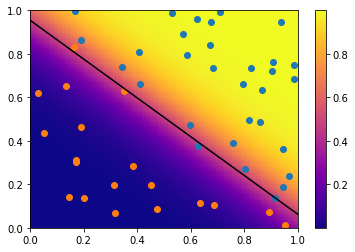

In [25]:
a,b,c = (9.845549997800655, 11.030270902706658, -10.527532935575872)
scalar_field_heatmap(make_logistic(a,b,c),0,1,0,1)
plot_decision_boundary(a,b,c)
plot_data(fake_data)

In [26]:
from cardata import priuses, bmws

In [47]:
prius_raw_prices = [p[4] for p in priuses]
prius_raw_mileages = [p[3] for p in priuses]
bmw_raw_prices = [bmw[4] for bmw in bmws]
bmw_raw_mileages = [bmw[3] for bmw in bmws]

def make_scale(data):
    min_val = min(data)
    max_val = max(data)
    def scale(x):
        return (x-min_val) / (max_val - min_val)
    def unscale(y):
        return y * (max_val - min_val) + min_val
    return scale, unscale

price_scale, price_unscale = make_scale(prius_raw_prices + bmw_raw_prices)
mileage_scale, mileage_unscale = make_scale(prius_raw_mileages + bmw_raw_mileages)



car_actual_data = []
for bmw in bmws:
    car_actual_data.append((mileage_scale(bmw[3]),price_scale(bmw[4]),True))
for prius in priuses:
    car_actual_data.append((mileage_scale(prius[3]),price_scale(prius[4]),False))
    


In [48]:
car_actual_data

[(0.3873793103448276, 0.35276804897430614, True),
 (0.4878735632183908, 0.35265032227683435, True),
 (0.39156896551724135, 0.3522677105100509, True),
 (0.11941379310344828, 0.37042705359507905, True),
 (0.1557816091954023, 0.6029667127762899, True),
 (0.1882816091954023, 0.6764870353474409, True),
 (0.47595402298850575, 0.6749860199546752, True),
 (0.31666666666666665, 0.35265032227683435, True),
 (0.367816091954023, 0.18798010418812727, True),
 (0.2449022988505747, 0.38208199664478915, True),
 (0.39080459770114945, 0.29378697354092476, True),
 (0.382183908045977, 0.26435529917296996, True),
 (0.4947183908045977, 0.29378697354092476, True),
 (0.4547183908045977, 0.2792182947287871, True),
 (0.3793103448275862, 0.0, True),
 (0.4709942528735632, 0.32333637460635134, True),
 (0.1724137931034483, 0.4998086941166083, True),
 (0.432132183908046, 0.4970126850516526, True),
 (0.22048850574712645, 0.44103364040380255, True),
 (0.22988505747126436, 0.23507078317685492, True),
 (0.291235632183908

In [49]:
def car_logistic_cost(a,b,c):
    return cost(make_logistic(a,b,c),car_actual_data)
gradient_descent3(car_logistic_cost,1,1,1,max_steps=10000)

(0.09971775482832926, 0.09597676925156465, 0.3347888916553118)
x,y,z=(0.989895,0.990175,0.965972), grad=(0.099718,0.095977,0.334789) 0.9634980664274286
(0.09836682634817542, 0.0936772709376462, 0.3292440524565702)
x,y,z=(0.979923,0.980577,0.932493), grad=(0.098367,0.093677,0.329244) 0.9504842877416028
(0.0970025387209001, 0.09135655504048244, 0.3236505765520561)
x,y,z=(0.970086,0.971209,0.899569), grad=(0.097003,0.091357,0.323651) 0.9379081684861884
(0.09562659880338131, 0.08901760855960991, 0.3180155917401208)
x,y,z=(0.960386,0.962074,0.867204), grad=(0.095627,0.089018,0.318016) 0.9257657447931787
(0.09424074415016369, 0.0866634659565994, 0.3123463207986954)
x,y,z=(0.950823,0.953172,0.835402), grad=(0.094241,0.086663,0.312346) 0.9140523174041895
(0.09284673080100525, 0.08429718889348585, 0.30665004196135104)
x,y,z=(0.941399,0.944506,0.804168), grad=(0.092847,0.084297,0.306650) 0.9027624835842565
(0.09144632428807083, 0.08192184907982254, 0.3009340415107759)
x,y,z=(0.932115,0.936076,0.

(0.01399553817320296, -0.033137661672961144, 0.011136773780630658)
x,y,z=(0.286994,1.281807,-0.565600), grad=(0.013996,-0.033138,0.011137) 0.6427614779753277
(0.013965539058898366, -0.03311262359024083, 0.011118390485744839)
x,y,z=(0.285594,1.285121,-0.566713), grad=(0.013966,-0.033113,0.011118) 0.6426197499480508
(0.013935670284776868, -0.033087470821482064, 0.011100379615172618)
x,y,z=(0.284197,1.288432,-0.567825), grad=(0.013936,-0.033087,0.011100) 0.6424783123905193
(0.013905929241814354, -0.03306220680837622, 0.01108273039975066)
x,y,z=(0.282804,1.291741,-0.568935), grad=(0.013906,-0.033062,0.011083) 0.6423371645020963
(0.01387631293240866, -0.03303683726857188, 0.01106543046049224)
x,y,z=(0.281413,1.295047,-0.570043), grad=(0.013876,-0.033037,0.011065) 0.6421963054915699
(0.013846819080602587, -0.033011366198871926, 0.011048470915613158)
x,y,z=(0.280026,1.298350,-0.571150), grad=(0.013847,-0.033011,0.011048) 0.6420557345717157
(0.013817444355727059, -0.03298579770710155, 0.011031

(0.007815311120483798, -0.026402923954589153, 0.009232387409864177)
x,y,z=(-0.005393,2.093779,-0.839524), grad=(0.007815,-0.026403,0.009232) 0.6126566708977697
(0.00779740516598689, -0.026382097891495784, 0.009227729746720252)
x,y,z=(-0.006175,2.096419,-0.840447), grad=(0.007797,-0.026382,0.009228) 0.612572364494026
(0.007779526411954086, -0.026361299472955724, 0.009223077468157998)
x,y,z=(-0.006955,2.099058,-0.841370), grad=(0.007780,-0.026361,0.009223) 0.6124882044864388
(0.007761675024918837, -0.02634052853243552, 0.009218431184800075)
x,y,z=(-0.007733,2.101694,-0.842292), grad=(0.007762,-0.026341,0.009218) 0.6124041905223524
(0.0077438503942651995, -0.026319784792379418, 0.009213790008468064)
x,y,z=(-0.008509,2.104328,-0.843214), grad=(0.007744,-0.026320,0.009214) 0.6123203222496604
(0.007726052519979723, -0.026299068474832016, 0.009209154716318085)
x,y,z=(-0.009283,2.106960,-0.844136), grad=(0.007726,-0.026299,0.009209) 0.6122365993190785
(0.00770828229024756, -0.02627837930223756

(0.004695591360177354, -0.02269992188346455, 0.008393603646152891)
x,y,z=(-0.130315,2.588285,-1.017262), grad=(0.004696,-0.022700,0.008394) 0.5981797208820661
(0.004682379595162025, -0.02268385656772241, 0.008389907047569796)
x,y,z=(-0.130784,2.590555,-1.018102), grad=(0.004682,-0.022684,0.008390) 0.5981189650087384
(0.004669187037005022, -0.022667812013150827, 0.008386214279256135)
x,y,z=(-0.131253,2.592824,-1.018941), grad=(0.004669,-0.022668,0.008386) 0.5980583005879825
(0.004656014851440522, -0.022651786831971023, 0.008382525674278817)
x,y,z=(-0.131719,2.595091,-1.019779), grad=(0.004656,-0.022652,0.008383) 0.5979977274135525
(0.004642861872734347, -0.022635782245428324, 0.008378841066104387)
x,y,z=(-0.132185,2.597356,-1.020618), grad=(0.004643,-0.022636,0.008379) 0.5979372452819733
(0.004629728655998011, -0.022619796754721644, 0.008375160399221695)
x,y,z=(-0.132649,2.599619,-1.021456), grad=(0.004630,-0.022620,0.008375) 0.5978768539881358
(0.004616614812653454, -0.0226038314145628

(0.001626777157424691, -0.01883512040515694, 0.007482990339096589)
x,y,z=(-0.217236,3.175197,-1.242142), grad=(0.001627,-0.018835,0.007483) 0.5839493385394663
(0.001618057077211235, -0.018823649136778905, 0.007480209841042337)
x,y,z=(-0.217398,3.177081,-1.242890), grad=(0.001618,-0.018824,0.007480) 0.5839080107617982
(0.001609349875584865, -0.01881219085801026, 0.007477432285079102)
x,y,z=(-0.217560,3.178963,-1.243638), grad=(0.001609,-0.018812,0.007477) 0.5838667331482592
(0.0016006547198783119, -0.018800745735384452, 0.0074746568940507645)
x,y,z=(-0.217721,3.180844,-1.244386), grad=(0.001601,-0.018801,0.007475) 0.5838255055989205
(0.0015919721652030883, -0.018789313435834575, 0.00747188389000193)
x,y,z=(-0.217881,3.182724,-1.245133), grad=(0.001592,-0.018789,0.007472) 0.5837843280144558
(0.0015833019895145893, -0.018777893681804877, 0.00746911377253296)
x,y,z=(-0.218040,3.184603,-1.245880), grad=(0.001583,-0.018778,0.007469) 0.5837432002961116
(0.0015746446924131759, -0.0187664870839

x,y,z=(-0.233590,3.496906,-1.372586), grad=(0.000242,-0.016961,0.007020) 0.5772327948472173
(0.0002351875916237624, -0.016951645251801234, 0.00701811597783046)
x,y,z=(-0.233615,3.498602,-1.373288), grad=(0.000235,-0.016952,0.007018) 0.5771991013722402
(0.00022845136893300723, -0.01694222528699436, 0.007015744152871607)
x,y,z=(-0.233638,3.500297,-1.373990), grad=(0.000228,-0.016942,0.007016) 0.5771654435141172
(0.00022172458313796136, -0.016932815591750465, 0.007013374326314198)
x,y,z=(-0.233661,3.501991,-1.374692), grad=(0.000222,-0.016933,0.007013) 0.5771318212084284
(0.00021500762281668342, -0.01692341577749149, 0.007011006387135932)
x,y,z=(-0.233683,3.503685,-1.375393), grad=(0.000215,-0.016923,0.007011) 0.5770982343898964
(0.00020830004387996354, -0.016914025122572462, 0.007008640779426017)
x,y,z=(-0.233705,3.505377,-1.376094), grad=(0.000208,-0.016914,0.007009) 0.5770646829940949
(0.00020160195735010423, -0.016904644903749867, 0.007006276448472581)
x,y,z=(-0.233726,3.507068,-1.376

x,y,z=(-0.229042,3.766247,-1.486016), grad=(-0.000757,-0.015522,0.006652) 0.5720831491496579
(-0.0007623479070232456, -0.015513739402058588, 0.006649520046245443)
x,y,z=(-0.228966,3.767800,-1.486681), grad=(-0.000762,-0.015514,0.006650) 0.5720545818186415
(-0.000767677921231012, -0.01550578731862352, 0.0066474415977208715)
x,y,z=(-0.228890,3.769351,-1.487346), grad=(-0.000768,-0.015506,0.006647) 0.5720260411350016
(-0.0007730007189891183, -0.015497843284305379, 0.006645364925553139)
x,y,z=(-0.228813,3.770902,-1.488011), grad=(-0.000773,-0.015498,0.006645) 0.5719975270549439
(-0.0007783159117195059, -0.015489907243593013, 0.006643289696675339)
x,y,z=(-0.228736,3.772451,-1.488675), grad=(-0.000778,-0.015490,0.006643) 0.5719690395335463
(-0.0007836236659556285, -0.015481979251997575, 0.006641216133132076)
x,y,z=(-0.228658,3.774000,-1.489339), grad=(-0.000784,-0.015482,0.006641) 0.5719405785262999
(-0.000788923926186335, -0.015474058532362948, 0.006639144068389897)
x,y,z=(-0.228580,3.77554

x,y,z=(-0.209542,4.014996,-1.594329), grad=(-0.001552,-0.014294,0.006325) 0.5676505986070637
(-0.001556232587239357, -0.014287224179511367, 0.006322809831780812)
x,y,z=(-0.209387,4.016425,-1.594961), grad=(-0.001556,-0.014287,0.006323) 0.5676259308573135
(-0.0015604467717962249, -0.014280450542305622, 0.0063209685268943204)
x,y,z=(-0.209231,4.017854,-1.595593), grad=(-0.001560,-0.014280,0.006321) 0.5676012834947377
(-0.0015646544615483989, -0.014273683732971477, 0.006319128443253155)
x,y,z=(-0.209075,4.019282,-1.596226), grad=(-0.001565,-0.014274,0.006319) 0.56757665648915
(-0.0015688568777412057, -0.01426692358497548, 0.006317289580857317)
x,y,z=(-0.208918,4.020709,-1.596857), grad=(-0.001569,-0.014267,0.006317) 0.5675520498087767
(-0.0015730525770847137, -0.014260169043605756, 0.006315452217262563)
x,y,z=(-0.208762,4.022136,-1.597489), grad=(-0.001573,-0.014260,0.006315) 0.5675274634219428
(-0.0015772431138911572, -0.014253421274596481, 0.006313615630823925)
x,y,z=(-0.208604,4.023562

x,y,z=(-0.137791,4.456995,-1.795460), grad=(-0.002672,-0.012342,0.005773) 0.5604008832755705
(-0.0026747619119555817, -0.012336942021791995, 0.005771619960212773)
x,y,z=(-0.137524,4.458229,-1.796038), grad=(-0.002675,-0.012337,0.005772) 0.5603816070692819
(-0.002677377153312386, -0.012331890396008354, 0.00577012943029094)
x,y,z=(-0.137257,4.459463,-1.796615), grad=(-0.002677,-0.012332,0.005770) 0.5603623436572799
(-0.002679989175022419, -0.012326842711516451, 0.005768639788547527)
x,y,z=(-0.136989,4.460696,-1.797192), grad=(-0.002680,-0.012327,0.005769) 0.5603430930237162
(-0.002682597088907261, -0.01232179930138319, 0.005767150646404475)
x,y,z=(-0.136721,4.461928,-1.797769), grad=(-0.002683,-0.012322,0.005767) 0.5603238551525248
(-0.002685201172522668, -0.012316759999075121, 0.005765663003062506)
x,y,z=(-0.136453,4.463161,-1.798345), grad=(-0.002685,-0.012317,0.005766) 0.5603046300277148
(-0.00268780142586864, -0.012311724860103394, 0.005764175637276293)
x,y,z=(-0.136184,4.464392,-1.7

(-0.003059911823918564, -0.011552402588483383, 0.005535383041277616)
x,y,z=(-0.089814,4.656404,-1.889867), grad=(-0.003060,-0.011552,0.005535) 0.557347603103993
(-0.003061952469348974, -0.01154798601026974, 0.0055340244058511194)
x,y,z=(-0.089508,4.657559,-1.890421), grad=(-0.003062,-0.011548,0.005534) 0.5573302595658894
(-0.0030639910608667885, -0.011543572762725168, 0.005532666880647648)
x,y,z=(-0.089201,4.658714,-1.890974), grad=(-0.003064,-0.011544,0.005533) 0.5573129264818971
(-0.0030660258221151685, -0.011539163012383124, 0.005531309577488781)
x,y,z=(-0.088895,4.659868,-1.891528), grad=(-0.003066,-0.011539,0.005531) 0.5572956038396245
(-0.0030680575857613816, -0.011534756148620946, 0.005529953218019484)
x,y,z=(-0.088588,4.661022,-1.892081), grad=(-0.003068,-0.011535,0.005530) 0.5572782916275417
(-0.003070086740383487, -0.011530353725750862, 0.00552859691406134)
x,y,z=(-0.088282,4.662176,-1.892634), grad=(-0.003070,-0.011530,0.005529) 0.557260989834187
(-0.003072112231269611, -0.0

x,y,z=(-0.036445,4.842374,-1.979946), grad=(-0.003359,-0.010864,0.005319) 0.5546033424310673
(-0.0033604324323166213, -0.010860211284305577, 0.005318038176931397)
x,y,z=(-0.036110,4.843460,-1.980478), grad=(-0.003360,-0.010860,0.005318) 0.5545875840708573
(-0.003362003342385313, -0.010856325503719932, 0.005316791229941187)
x,y,z=(-0.035773,4.844546,-1.981010), grad=(-0.003362,-0.010856,0.005317) 0.5545718344258922
(-0.003363571754452199, -0.010852442498691849, 0.005315545226640547)
x,y,z=(-0.035437,4.845632,-1.981542), grad=(-0.003364,-0.010852,0.005316) 0.5545560934872605
(-0.0033651378905618853, -0.010848562324732478, 0.005314299667429118)
x,y,z=(-0.035101,4.846717,-1.982073), grad=(-0.003365,-0.010849,0.005314) 0.5545403612458493
(-0.003366701584180917, -0.010844685370419877, 0.005313054996396108)
x,y,z=(-0.034764,4.847802,-1.982605), grad=(-0.003367,-0.010845,0.005313) 0.5545246376926852
(-0.0033682620581531775, -0.010840810914109081, 0.0053118107694523084)
x,y,z=(-0.034428,4.84888

(-0.0035886483784572567, -0.010252655001329528, 0.005119130729708818)
x,y,z=(0.021644,5.018626,-2.067095), grad=(-0.003589,-0.010253,0.005119) 0.5520860166061309
(-0.0035898370387385707, -0.010249210922974167, 0.005117978706787476)
x,y,z=(0.022003,5.019651,-2.067607), grad=(-0.003590,-0.010249,0.005118) 0.5520715983699336
(-0.003591024366752255, -0.010245769509154068, 0.00511682779408916)
x,y,z=(0.022362,5.020676,-2.068119), grad=(-0.003591,-0.010246,0.005117) 0.55205718751882
(-0.003592209085741831, -0.010242330260268865, 0.005115676992413145)
x,y,z=(0.022721,5.021701,-2.068630), grad=(-0.003592,-0.010242,0.005116) 0.5520427840450313
(-0.0035933917508188117, -0.010238893287340862, 0.005114527134426701)
x,y,z=(0.023080,5.022725,-2.069142), grad=(-0.003593,-0.010239,0.005115) 0.5520283879422985
(-0.003594572306472046, -0.010235459089970419, 0.005113377609507166)
x,y,z=(0.023440,5.023749,-2.069653), grad=(-0.003595,-0.010235,0.005113) 0.5520139992036217
(-0.0035957509192349867, -0.010232

x,y,z=(0.082696,5.184279,-2.150534), grad=(-0.003759,-0.009713,0.004935) 0.5497888193637295
(-0.0037601625146839322, -0.009709476110650393, 0.0049338014777898015)
x,y,z=(0.083071,5.185250,-2.151027), grad=(-0.003760,-0.009709,0.004934) 0.5497755390774698
(-0.003761036149182009, -0.009706406843588096, 0.004932731999950329)
x,y,z=(0.083447,5.186221,-2.151520), grad=(-0.003761,-0.009706,0.004933) 0.5497622651524179
(-0.003761907951812095, -0.009703339741460695, 0.004931663354778126)
x,y,z=(0.083824,5.187192,-2.152014), grad=(-0.003762,-0.009703,0.004932) 0.5497489975832817
(-0.003762778311152249, -0.009700274415690133, 0.0049305949316505275)
x,y,z=(0.084200,5.188162,-2.152507), grad=(-0.003763,-0.009700,0.004931) 0.5497357363643905
(-0.0037636466720909587, -0.009697211643432528, 0.004929527230167895)
x,y,z=(0.084576,5.189132,-2.153000), grad=(-0.003764,-0.009697,0.004930) 0.5497224814906126
(-0.0037645136452508876, -0.009694150814065215, 0.004928459584196413)
x,y,z=(0.084952,5.190102,-2.1

x,y,z=(0.211769,5.491894,-2.309213), grad=(-0.003967,-0.008793,0.004602) 0.5456884245275664
(-0.003967769668374228, -0.008790221826974537, 0.0046009311909464435)
x,y,z=(0.212166,5.492773,-2.309673), grad=(-0.003968,-0.008790,0.004601) 0.5456770028722427
(-0.003968172068709503, -0.00878774114464866, 0.00459999593907063)
x,y,z=(0.212563,5.493652,-2.310133), grad=(-0.003968,-0.008788,0.004600) 0.5456655861216219
(-0.003968573136777148, -0.008785261294990052, 0.004599060687194816)
x,y,z=(0.212959,5.494531,-2.310593), grad=(-0.003969,-0.008785,0.004599) 0.5456541742721134
(-0.003968973316666374, -0.008782783110665982, 0.0045981263234974225)
x,y,z=(0.213356,5.495409,-2.311053), grad=(-0.003969,-0.008783,0.004598) 0.5456427673210527
(-0.003969372108776819, -0.008780307035765657, 0.004597191737755424)
x,y,z=(0.213753,5.496288,-2.311513), grad=(-0.003969,-0.008780,0.004597) 0.5456313652644619
(-0.003969769957197693, -0.008777832237621812, 0.004596257984680693)
x,y,z=(0.214150,5.497166,-2.311973

(-0.004019668542572931, -0.008398019223302059, 0.004450311174508339)
x,y,z=(0.278499,5.635402,-2.384794), grad=(-0.004020,-0.008398,0.004450) 0.5438464597942994
(-0.004019896138292985, -0.00839577074412175, 0.0044494309341833885)
x,y,z=(0.278901,5.636242,-2.385239), grad=(-0.004020,-0.008396,0.004449) 0.5438358119151228
(-0.004020123067879224, -0.008393523153119862, 0.004448551193458799)
x,y,z=(0.279303,5.637081,-2.385683), grad=(-0.004020,-0.008394,0.004449) 0.5438251684119015
(-0.004020348387642078, -0.008391277116430208, 0.004447672340912628)
x,y,z=(0.279705,5.637921,-2.386128), grad=(-0.004020,-0.008391,0.004448) 0.5438145292819153
(-0.004020573207804571, -0.008389032300985881, 0.004446792600188038)
x,y,z=(0.280107,5.638760,-2.386573), grad=(-0.004021,-0.008389,0.004447) 0.5438038945220943
(-0.004020797084277492, -0.008386788873320335, 0.004445914025197624)
x,y,z=(0.280509,5.639599,-2.387018), grad=(-0.004021,-0.008387,0.004446) 0.5437932641299927
(-0.004021019850527389, -0.0083845

x,y,z=(0.345469,5.771823,-2.457486), grad=(-0.004045,-0.008042,0.004308) 0.5421367926528861
(-0.004045264567872894, -0.008039618747388351, 0.004307516120969002)
x,y,z=(0.345874,5.772627,-2.457917), grad=(-0.004045,-0.008040,0.004308) 0.5421268342633572
(-0.004045347557043988, -0.008037571607153531, 0.004306685507613245)
x,y,z=(0.346278,5.773431,-2.458348), grad=(-0.004045,-0.008038,0.004307) 0.5421168798153143
(-0.004045429547014358, -0.008035525743675187, 0.004305854949768638)
x,y,z=(0.346683,5.774235,-2.458778), grad=(-0.004045,-0.008036,0.004306) 0.5421069293063013
(-0.004045510815339763, -0.008033480712864114, 0.0043050251135689985)
x,y,z=(0.347087,5.775038,-2.459209), grad=(-0.004046,-0.008033,0.004305) 0.542096982733992
(-0.004045591639575958, -0.008031436903298368, 0.004304195221858207)
x,y,z=(0.347492,5.775842,-2.459640), grad=(-0.004046,-0.008031,0.004304) 0.5420870400960164
(-0.004045671242566826, -0.008029394648044854, 0.004303365885258929)
x,y,z=(0.347896,5.776645,-2.460070

(-0.004048954005517276, -0.007714479720620494, 0.0041733371752556685)
x,y,z=(0.413083,5.903363,-2.528305), grad=(-0.004049,-0.007714,0.004173) 0.5405266264137972
(-0.004048918922469697, -0.007712606385800154, 0.004172550693265134)
x,y,z=(0.413487,5.904134,-2.528722), grad=(-0.004049,-0.007713,0.004173) 0.5405172949106182
(-0.00404888256266564, -0.007710734272225142, 0.004171764821897263)
x,y,z=(0.413892,5.904905,-2.529139), grad=(-0.004049,-0.007711,0.004172) 0.5405079669817069
(-0.004048846480417339, -0.007708862935806246, 0.0041709786174624845)
x,y,z=(0.414297,5.905676,-2.529556), grad=(-0.004049,-0.007709,0.004171) 0.5404986426249626
(-0.004048809121412559, -0.007706992820632678, 0.00417019302365037)
x,y,z=(0.414702,5.906447,-2.529974), grad=(-0.004049,-0.007707,0.004170) 0.5404893218383902
(-0.0040487714293408715, -0.0077051236491486805, 0.004169407152282498)
x,y,z=(0.415107,5.907218,-2.530391), grad=(-0.004049,-0.007705,0.004169) 0.5404800046198905
(-0.004048732960113067, -0.00770

x,y,z=(0.547362,6.150457,-2.663076), grad=(-0.004006,-0.007140,0.003925) 0.5376053795397688
(-0.0040058120708244506, -0.007138552636899721, 0.003923801116807447)
x,y,z=(0.547763,6.151171,-2.663468), grad=(-0.004006,-0.007139,0.003924) 0.5375971371261864
(-0.004005600351293661, -0.00713696512899703, 0.003923091573272508)
x,y,z=(0.548163,6.151885,-2.663861), grad=(-0.004006,-0.007137,0.003923) 0.5375888977064034
(-0.0040053883542071145, -0.007135378675806214, 0.003922381974226417)
x,y,z=(0.548564,6.152599,-2.664253), grad=(-0.004005,-0.007135,0.003922) 0.5375806612788463
(-0.004005175802009056, -0.007133792722215759, 0.0039216722641580255)
x,y,z=(0.548965,6.153313,-2.664645), grad=(-0.004005,-0.007134,0.003922) 0.537572427841835
(-0.004004963138788695, -0.007132207934359479, 0.003920962831645389)
x,y,z=(0.549365,6.154026,-2.665037), grad=(-0.004005,-0.007132,0.003921) 0.5375641973942245
(-0.004004749753923368, -0.007130623479570107, 0.0039202534546439035)
x,y,z=(0.549766,6.154739,-2.6654

x,y,z=(0.613543,6.266863,-2.727265), grad=(-0.003966,-0.006886,0.003809) 0.536277047535967
(-0.0039652554572026065, -0.006884879776440021, 0.00380871589769125)
x,y,z=(0.613939,6.267552,-2.727646), grad=(-0.003965,-0.006885,0.003809) 0.5362692823523595
(-0.0039649797888256, -0.006883409063999505, 0.003808038772668626)
x,y,z=(0.614336,6.268240,-2.728027), grad=(-0.003965,-0.006883,0.003808) 0.5362615199284402
(-0.003964704786582408, -0.006881938684625897, 0.00380736248031327)
x,y,z=(0.614732,6.268929,-2.728408), grad=(-0.003965,-0.006882,0.003807) 0.5362537602632067
(-0.003964428729627343, -0.006880469359964163, 0.003806685965913309)
x,y,z=(0.615129,6.269617,-2.728789), grad=(-0.003964,-0.006880,0.003807) 0.536246003354919
(-0.003964152450627673, -0.006879000978991998, 0.0038060096735579533)
x,y,z=(0.615525,6.270305,-2.729169), grad=(-0.003964,-0.006879,0.003806) 0.5362382492024259
(-0.00396387600509455, -0.006877532709042137, 0.003805333547736051)
x,y,z=(0.615922,6.270993,-2.729550), gr

x,y,z=(0.679361,6.379875,-2.789958), grad=(-0.003915,-0.006649,0.003699) 0.5350175381916967
(-0.00391488097484083, -0.0066480339557395485, 0.0036982463197769854)
x,y,z=(0.679753,6.380539,-2.790328), grad=(-0.003915,-0.006648,0.003698) 0.5350102163103624
(-0.003914554458249298, -0.006646666383018007, 0.003697599947932139)
x,y,z=(0.680144,6.381204,-2.790698), grad=(-0.003915,-0.006647,0.003698) 0.5350028969808812
(-0.003914227775124311, -0.00664529997603064, 0.00369695346506499)
x,y,z=(0.680536,6.381869,-2.791067), grad=(-0.003914,-0.006645,0.003697) 0.5349955802026993
(-0.003913900758932417, -0.006643934013132484, 0.0036963082034431683)
x,y,z=(0.680927,6.382533,-2.791437), grad=(-0.003914,-0.006644,0.003696) 0.5349882659743252
(-0.003913573354162464, -0.006642568383301234, 0.0036956619981317754)
x,y,z=(0.681319,6.383198,-2.791807), grad=(-0.003914,-0.006643,0.003696) 0.5349809542943195
(-0.003913245838370209, -0.006641203530626102, 0.0036950160703761387)
x,y,z=(0.681710,6.383862,-2.7921

x,y,z=(0.743888,6.488424,-2.850487), grad=(-0.003858,-0.006430,0.003594) 0.5338362072938703
(-0.003857219654679439, -0.0064287408720782495, 0.0035932951609169996)
x,y,z=(0.744274,6.489067,-2.850846), grad=(-0.003857,-0.006429,0.003593) 0.5338292936550659
(-0.0038568531700590206, -0.006427464670711622, 0.0035926766001589164)
x,y,z=(0.744659,6.489710,-2.851206), grad=(-0.003857,-0.006427,0.003593) 0.5338223823848485
(-0.003856485797260183, -0.006426189190989959, 0.0035920584834900427)
x,y,z=(0.745045,6.490352,-2.851565), grad=(-0.003856,-0.006426,0.003592) 0.5338154734822824
(-0.0038561185354836474, -0.006424914044335204, 0.003591440588865774)
x,y,z=(0.745431,6.490995,-2.851924), grad=(-0.003856,-0.006425,0.003591) 0.5338085669463496
(-0.0038557509961513557, -0.006423639508303112, 0.003590822694241505)
x,y,z=(0.745816,6.491637,-2.852283), grad=(-0.003856,-0.006424,0.003591) 0.5338016627759794
(-0.0038553832347744594, -0.006422365749427138, 0.003590205021661841)
x,y,z=(0.746202,6.492280,-

x,y,z=(0.807786,6.594074,-2.909660), grad=(-0.003794,-0.006224,0.003493) 0.5327136859921727
(-0.00379320902455155, -0.006222533210050261, 0.003492228727930786)
x,y,z=(0.808165,6.594696,-2.910010), grad=(-0.003793,-0.006223,0.003492) 0.5327071539383567
(-0.0037928102324411165, -0.006221338554564779, 0.003491636146391475)
x,y,z=(0.808545,6.595319,-2.910359), grad=(-0.003793,-0.006221,0.003492) 0.5327006240876532
(-0.0037924117178864385, -0.00622014439867966, 0.0034910443975194323)
x,y,z=(0.808924,6.595941,-2.910708), grad=(-0.003792,-0.006220,0.003491) 0.5326940964394133
(-0.0037920125371979463, -0.0062189509089283545, 0.003490452149047029)
x,y,z=(0.809303,6.596563,-2.911057), grad=(-0.003792,-0.006219,0.003490) 0.5326875709922666
(-0.0037916136340652097, -0.006217757752243957, 0.003489860733241894)
x,y,z=(0.809682,6.597185,-2.911406), grad=(-0.003792,-0.006218,0.003490) 0.5326810477455634
(-0.003791214619910171, -0.006216564762093013, 0.003489268817836398)
x,y,z=(0.810061,6.597806,-2.91

x,y,z=(0.931822,6.794985,-3.022785), grad=(-0.003653,-0.005849,0.003304) 0.5306548331544656
(-0.0036528497448011657, -0.005848431849102196, 0.003302966066858375)
x,y,z=(0.932188,6.795569,-3.023116), grad=(-0.003653,-0.005848,0.003303) 0.5306489860100334
(-0.003652409430349612, -0.005847374694738295, 0.0033024208363310577)
x,y,z=(0.932553,6.796154,-3.023446), grad=(-0.003652,-0.005847,0.003302) 0.5306431407844239
(-0.0036519688938534533, -0.005846318095485907, 0.003301875494781438)
x,y,z=(0.932918,6.796739,-3.023776), grad=(-0.003652,-0.005846,0.003302) 0.5306372974768113
(-0.0036515284683795975, -0.005845262217878485, 0.0033013300422095157)
x,y,z=(0.933283,6.797324,-3.024107), grad=(-0.003652,-0.005845,0.003301) 0.5306314560864409
(-0.003651087709838834, -0.005844206506804516, 0.0033007852002602573)
x,y,z=(0.933649,6.797908,-3.024437), grad=(-0.003651,-0.005844,0.003301) 0.530625616612339
(-0.003650647117831524, -0.005843150962264002, 0.0033002403027998476)
x,y,z=(0.934014,6.798493,-3.

x,y,z=(1.050997,6.984142,-3.129854), grad=(-0.003503,-0.005517,0.003129) 0.5288092702318279
(-0.0035023000058526294, -0.005515578992760322, 0.003128289182814543)
x,y,z=(1.051347,6.984694,-3.130167), grad=(-0.003502,-0.005516,0.003128) 0.5288040215788214
(-0.0035018392632973723, -0.005514634026433044, 0.0031277848640056775)
x,y,z=(1.051698,6.985246,-3.130480), grad=(-0.003502,-0.005515,0.003128) 0.5287987746078686
(-0.0035013784652309634, -0.005513688504994254, 0.0031272803786633586)
x,y,z=(1.052048,6.985797,-3.130793), grad=(-0.003501,-0.005514,0.003127) 0.5287935293177651
(-0.0035009172785864964, -0.005512743316622372, 0.003126776559454854)
x,y,z=(1.052398,6.986349,-3.131105), grad=(-0.003501,-0.005513,0.003127) 0.5287882857084267
(-0.003500456536031239, -0.005511798794384304, 0.003126272351668291)
x,y,z=(1.052748,6.986900,-3.131418), grad=(-0.003500,-0.005512,0.003126) 0.5287830437791367
(-0.003499995182853318, -0.005510854216635085, 0.0031257683659263328)
x,y,z=(1.053098,6.987451,-3

(-0.0034253754280275856, -0.0053626000854621264, 0.003046108254097227)
x,y,z=(1.108852,7.074980,-3.181414), grad=(-0.003425,-0.005363,0.003046) 0.5279555723858992
(-0.003424909856002171, -0.005361702414635691, 0.003045622198457114)
x,y,z=(1.109194,7.075516,-3.181719), grad=(-0.003425,-0.005362,0.003046) 0.527950595835196
(-0.003424444561532512, -0.005360804355231197, 0.0030451368089508156)
x,y,z=(1.109537,7.076052,-3.182024), grad=(-0.003424,-0.005361,0.003045) 0.5279456208620446
(-0.003423979211551702, -0.005359907128493972, 0.0030446514749556683)
x,y,z=(1.109879,7.076588,-3.182328), grad=(-0.003424,-0.005360,0.003045) 0.5279406474659288
(-0.0034235136950374386, -0.0053590097352232925, 0.003044165752382463)
x,y,z=(1.110222,7.077124,-3.182633), grad=(-0.003424,-0.005359,0.003044) 0.5279356756459791
(-0.0034230485115900825, -0.005358113119108731, 0.003043680307365013)
x,y,z=(1.110564,7.077660,-3.182937), grad=(-0.003423,-0.005358,0.003044) 0.527930705402035
(-0.003422582884053516, -0.00

x,y,z=(1.165075,7.162789,-3.231323), grad=(-0.003348,-0.005217,0.002967) 0.5271506288525785
(-0.003347512600724354, -0.005216318209980988, 0.002966465350725)
x,y,z=(1.165410,7.163311,-3.231619), grad=(-0.003348,-0.005216,0.002966) 0.5271459061678386
(-0.003347046362565124, -0.005215463893363657, 0.002965996892119825)
x,y,z=(1.165744,7.163832,-3.231916), grad=(-0.003347,-0.005215,0.002966) 0.5271411849648906
(-0.003346579513783231, -0.0052146096877686305, 0.0029655290441373133)
x,y,z=(1.166079,7.164354,-3.232213), grad=(-0.003347,-0.005215,0.002966) 0.5271364652430997
(-0.0033461128870459424, -0.005213755870751661, 0.002965061251665953)
x,y,z=(1.166414,7.164875,-3.232509), grad=(-0.003346,-0.005214,0.002965) 0.5271317470020387
(-0.0033456462603086543, -0.0052129021647569955, 0.0029645931261276853)
x,y,z=(1.166748,7.165397,-3.232806), grad=(-0.003346,-0.005213,0.002965) 0.5271270302410215
(-0.0033451793560156096, -0.005212049069384993, 0.0029641258332566856)
x,y,z=(1.167083,7.165918,-3.2

(-0.003270107740418818, -0.005077809394472221, 0.0028901468991772462)
x,y,z=(1.220340,7.248750,-3.280229), grad=(-0.003270,-0.005078,0.002890) 0.5263820645480844
(-0.003269641724304193, -0.005076994601794563, 0.0028896954269843457)
x,y,z=(1.220667,7.249258,-3.280518), grad=(-0.003270,-0.005077,0.002890) 0.5263775818261547
(-0.0032691762077899293, -0.005076180031161509, 0.0028892440658137473)
x,y,z=(1.220994,7.249765,-3.280807), grad=(-0.003269,-0.005076,0.002889) 0.5263731004970414
(-0.0032687109133202707, -0.005075365793595362, 0.002888792926687754)
x,y,z=(1.221320,7.250273,-3.281096), grad=(-0.003269,-0.005075,0.002889) 0.5263686205600725
(-0.0032682448972056457, -0.005074551833584973, 0.002888341676539458)
x,y,z=(1.221647,7.250781,-3.281385), grad=(-0.003268,-0.005075,0.002888) 0.5263641420145769
(-0.0032677799358028945, -0.00507373776255228, 0.0028878904819023134)
x,y,z=(1.221974,7.251288,-3.281674), grad=(-0.003268,-0.005074,0.002888) 0.5263596648603164
(-0.0032673143082663286, -0

x,y,z=(1.273987,7.331942,-3.327595), grad=(-0.003193,-0.004946,0.002817) 0.5256566277452103
(-0.003192609510356903, -0.004944807174142523, 0.0028160804795234785)
x,y,z=(1.274306,7.332437,-3.327876), grad=(-0.003193,-0.004945,0.002816) 0.5256523693442385
(-0.0031921471579782596, -0.004944029018824673, 0.0028156449945421305)
x,y,z=(1.274626,7.332931,-3.328158), grad=(-0.003192,-0.004944,0.002816) 0.5256481122535487
(-0.0031916848055996163, -0.00494325080799567, 0.0028152093985384795)
x,y,z=(1.274945,7.333426,-3.328439), grad=(-0.003192,-0.004943,0.002815) 0.525643856472808
(-0.003191222841799032, -0.004942472819211273, 0.002814773913557131)
x,y,z=(1.275264,7.333920,-3.328721), grad=(-0.003191,-0.004942,0.002815) 0.5256396020017368
(-0.0031907604894203887, -0.004941694941449178, 0.0028143387616426903)
x,y,z=(1.275583,7.334414,-3.329002), grad=(-0.003191,-0.004942,0.002814) 0.5256353488397305
(-0.0031902984145975016, -0.00494091739675399, 0.0028139034987059467)
x,y,z=(1.275902,7.334909,-3.

x,y,z=(1.377779,7.492449,-3.419031), grad=(-0.003041,-0.004697,0.002676) 0.5243082207436985
(-0.0030403888853506203, -0.0046965435423026464, 0.002675960619383904)
x,y,z=(1.378083,7.492919,-3.419299), grad=(-0.003040,-0.004697,0.002676) 0.5243043736462539
(-0.0030399378572468294, -0.004695829224808702, 0.002675554444290402)
x,y,z=(1.378387,7.493388,-3.419566), grad=(-0.003040,-0.004696,0.002676) 0.5243005277117392
(-0.003039487051187643, -0.004695115240381666, 0.0026751483802192016)
x,y,z=(1.378691,7.493858,-3.419834), grad=(-0.003039,-0.004695,0.002675) 0.5242966829396623
(-0.0030390358565503986, -0.00469440131146578, 0.0026747417055253387)
x,y,z=(1.378995,7.494327,-3.420101), grad=(-0.003039,-0.004694,0.002675) 0.524292839329476
(-0.0030385849394689098, -0.0046936876045945, 0.002674335807987592)
x,y,z=(1.379299,7.494797,-3.420369), grad=(-0.003039,-0.004694,0.002674) 0.5242889968811423
(-0.0030381344664766313, -0.004692974119767824, 0.0026739293553383336)
x,y,z=(1.379603,7.495266,-3.4

(-0.0028926975261959714, -0.00446801856561482, 0.002545112398255132)
x,y,z=(1.476862,7.645469,-3.506212), grad=(-0.002893,-0.004468,0.002545) 0.5230855078646703
(-0.002892262152236829, -0.004467359315182891, 0.0025447329795365192)
x,y,z=(1.477151,7.645916,-3.506466), grad=(-0.002892,-0.004467,0.002545) 0.5230820272746358
(-0.002891826889299989, -0.004466700009239809, 0.002544352617128336)
x,y,z=(1.477440,7.646363,-3.506721), grad=(-0.002892,-0.004467,0.002544) 0.5230785477187727
(-0.0028913917373854514, -0.00446604081431903, 0.0025439731984097233)
x,y,z=(1.477729,7.646810,-3.506975), grad=(-0.002891,-0.004466,0.002544) 0.5230750691970577
(-0.0028909565854709136, -0.004465381952465158, 0.002543593391113052)
x,y,z=(1.478019,7.647256,-3.507229), grad=(-0.002891,-0.004465,0.002544) 0.5230715917089135
(-0.0028905208784448634, -0.004464723035100135, 0.0025432139168832884)
x,y,z=(1.478308,7.647703,-3.507484), grad=(-0.002891,-0.004465,0.002543) 0.5230681152540338
(-0.0028900857820414773, -0.0

(-0.002750695449420331, -0.004256468621415385, 0.00242268410854394)
x,y,z=(1.570814,7.790699,-3.588909), grad=(-0.002751,-0.004256,0.002423) 0.5219815354016001
(-0.0027502782276076425, -0.004255856666484297, 0.0024223285041092024)
x,y,z=(1.571090,7.791125,-3.589151), grad=(-0.002750,-0.004256,0.002422) 0.521978380307426
(-0.0027498610613061053, -0.0042552448780866624, 0.0024219727886521623)
x,y,z=(1.571365,7.791550,-3.589394), grad=(-0.002750,-0.004255,0.002422) 0.5219752261359316
(-0.0027494442280714755, -0.004254632645599819, 0.002421617295239727)
x,y,z=(1.571640,7.791976,-3.589636), grad=(-0.002749,-0.004255,0.002422) 0.5219720728868346
(-0.0027490271172810896, -0.004254021356802546, 0.0024212618018272917)
x,y,z=(1.571915,7.792401,-3.589878), grad=(-0.002749,-0.004254,0.002421) 0.5219689205599534
(-0.00274861028404646, -0.004253409679427214, 0.0024209061418814025)
x,y,z=(1.572189,7.792827,-3.590120), grad=(-0.002749,-0.004253,0.002421) 0.5219657691547385
(-0.0027481936173452837, -0.

x,y,z=(1.660143,7.929135,-3.667659), grad=(-0.002615,-0.004060,0.002308) 0.520980045561252
(-0.0026146549372205105, -0.004059122259968354, 0.0023076025531637246)
x,y,z=(1.660404,7.929540,-3.667890), grad=(-0.002615,-0.004059,0.002308) 0.5209771811502867
(-0.002614257477377662, -0.004058551716356079, 0.002307269097678325)
x,y,z=(1.660666,7.929946,-3.668121), grad=(-0.002614,-0.004059,0.002307) 0.5209743175642217
(-0.002613859962023662, -0.004057981672344165, 0.0023069351425925645)
x,y,z=(1.660927,7.930352,-3.668352), grad=(-0.002614,-0.004058,0.002307) 0.5209714548029032
(-0.0026134628352477212, -0.004057411295265344, 0.002306601742618316)
x,y,z=(1.661188,7.930758,-3.668582), grad=(-0.002613,-0.004057,0.002307) 0.5209685928660597
(-0.0026130658194940828, -0.004056841362275732, 0.0023062684536663703)
x,y,z=(1.661450,7.931164,-3.668813), grad=(-0.002613,-0.004057,0.002306) 0.5209657317534014
(-0.0026126686927181414, -0.004056271262752667, 0.0023059349426698193)
x,y,z=(1.661711,7.931569,-3

x,y,z=(1.703013,7.995753,-3.705519), grad=(-0.002550,-0.003967,0.002253) 0.5205156489064734
(-0.002549532918326623, -0.0039660015266348185, 0.0022530748374953013)
x,y,z=(1.703268,7.996149,-3.705744), grad=(-0.002550,-0.003966,0.002253) 0.5205129177577511
(-0.002549145672535602, -0.003965450078858564, 0.0022527517625951805)
x,y,z=(1.703523,7.996546,-3.705969), grad=(-0.002549,-0.003965,0.002253) 0.5205101873897189
(-0.0025487583712334293, -0.003964898797615764, 0.0022524282991170015)
x,y,z=(1.703778,7.996942,-3.706195), grad=(-0.002549,-0.003965,0.002252) 0.5205074578021239
(-0.002548371291975862, -0.003964347072283753, 0.002252104835638822)
x,y,z=(1.704033,7.997339,-3.706420), grad=(-0.002548,-0.003964,0.002252) 0.520504728994818
(-0.0025479844347628994, -0.003963795735529801, 0.0022517820382944574)
x,y,z=(1.704287,7.997735,-3.706645), grad=(-0.002548,-0.003964,0.002252) 0.5205020009677357
(-0.0025475974665276346, -0.003963244454287001, 0.0022514586858385804)
x,y,z=(1.704542,7.998132,-

x,y,z=(1.745064,8.061238,-3.742707), grad=(-0.002486,-0.003876,0.002200) 0.5200701764562673
(-0.0024857139126856936, -0.0038753840721077386, 0.002199906645431493)
x,y,z=(1.745313,8.061625,-3.742927), grad=(-0.002486,-0.003875,0.002200) 0.5200675722054774
(-0.0024853368809464997, -0.003874850221365948, 0.0021995933404939877)
x,y,z=(1.745562,8.062013,-3.743147), grad=(-0.002485,-0.003875,0.002200) 0.5200649686938029
(-0.002484959849207306, -0.003874316870224519, 0.0021992798135118774)
x,y,z=(1.745810,8.062400,-3.743367), grad=(-0.002485,-0.003874,0.002199) 0.5200623659210464
(-0.002484583206046171, -0.0038737826309046693, 0.0021989666195966744)
x,y,z=(1.746059,8.062788,-3.743587), grad=(-0.002485,-0.003874,0.002199) 0.5200597638868905
(-0.0024842061743069774, -0.0038732495018078453, 0.002198653037103413)
x,y,z=(1.746307,8.063175,-3.743807), grad=(-0.002484,-0.003873,0.002199) 0.5200571625913359
(-0.0024838291980789347, -0.0038727165392444755, 0.0021983402872774198)
x,y,z=(1.746556,8.0635

x,y,z=(1.785822,8.124855,-3.778806), grad=(-0.002424,-0.003789,0.002149) 0.5196478150710506
(-0.002423965306452407, -0.0037881847131977643, 0.0021486650233820473)
x,y,z=(1.786064,8.125233,-3.779020), grad=(-0.002424,-0.003788,0.002149) 0.5196453302743802
(-0.002423598821831948, -0.003787667793357112, 0.002148360988806796)
x,y,z=(1.786307,8.125612,-3.779235), grad=(-0.002424,-0.003788,0.002148) 0.5196428461780367
(-0.0024232317820999764, -0.003787151040049914, 0.0021480572317873012)
x,y,z=(1.786549,8.125991,-3.779450), grad=(-0.002423,-0.003787,0.002148) 0.5196403627816316
(-0.002422864908901459, -0.0037866343977650176, 0.0021477535857901088)
x,y,z=(1.786791,8.126370,-3.779665), grad=(-0.002423,-0.003787,0.002148) 0.5196378800850145
(-0.0024224983132586976, -0.003786117810991273, 0.0021474499397929163)
x,y,z=(1.787034,8.126748,-3.779880), grad=(-0.002422,-0.003786,0.002147) 0.5196353980879173
(-0.0024221315510824827, -0.0037856011131952257, 0.002147145905217665)
x,y,z=(1.787276,8.127127

(-0.0023051366373159172, -0.0036212977643680522, 0.0020504504757899405)
x,y,z=(1.864791,8.248581,-3.848924), grad=(-0.002305,-0.003621,0.002050) 0.5188554805945836
(-0.0023047898591541474, -0.0036208120973055665, 0.0020501642047830813)
x,y,z=(1.865022,8.248943,-3.849129), grad=(-0.002305,-0.003621,0.002050) 0.5188532175719306
(-0.0023044431365035283, -0.0036203258751315677, 0.0020498779337762216)
x,y,z=(1.865252,8.249305,-3.849334), grad=(-0.002304,-0.003620,0.002050) 0.5188509551782426
(-0.0023040961918083043, -0.003619840208069082, 0.0020495919958362693)
x,y,z=(1.865483,8.249667,-3.849539), grad=(-0.002304,-0.003620,0.002050) 0.5188486934135641
(-0.002303749913246895, -0.003619354818562353, 0.002049306113407468)
x,y,z=(1.865713,8.250029,-3.849744), grad=(-0.002304,-0.003619,0.002049) 0.5188464322775335
(-0.0023034031905962765, -0.0036188694845667745, 0.002049020397512121)
x,y,z=(1.865943,8.250391,-3.849949), grad=(-0.002303,-0.003619,0.002049) 0.5188441717697407
(-0.00230305680101256

(-0.002192902026812429, -0.0034642523320363434, 0.0019579466378799515)
x,y,z=(1.939671,8.366537,-3.915653), grad=(-0.002193,-0.003464,0.001958) 0.518135478752731
(-0.0021925749551093476, -0.0034637948646387045, 0.001957677297774215)
x,y,z=(1.939890,8.366884,-3.915849), grad=(-0.002193,-0.003464,0.001958) 0.5181334145523568
(-0.002192247328294754, -0.00346333717519646, 0.0019574078466461763)
x,y,z=(1.940110,8.367230,-3.916045), grad=(-0.002192,-0.003463,0.001957) 0.5181313509179829
(-0.0021919198680136137, -0.003462879707798821, 0.0019571378959177765)
x,y,z=(1.940329,8.367576,-3.916241), grad=(-0.002192,-0.003463,0.001957) 0.518129287849701
(-0.002191592962843986, -0.0034624221848900305, 0.0019568687223454934)
x,y,z=(1.940548,8.367923,-3.916436), grad=(-0.002192,-0.003462,0.001957) 0.5181272253473695
(-0.0021912656135851484, -0.0034619645509589374, 0.0019565990491728497)
x,y,z=(1.940767,8.368269,-3.916632), grad=(-0.002191,-0.003462,0.001957) 0.5181251634106051
(-0.002190938763926672, -

x,y,z=(2.010920,8.479414,-3.979391), grad=(-0.002087,-0.003316,0.001871) 0.5174783488459059
(-0.0020867196856425357, -0.0033157031034515426, 0.0018704670587560497)
x,y,z=(2.011129,8.479746,-3.979578), grad=(-0.002087,-0.003316,0.001870) 0.5174764637693631
(-0.0020864111546640353, -0.0033152711711834887, 0.0018702124846165387)
x,y,z=(2.011337,8.480078,-3.979765), grad=(-0.002086,-0.003315,0.001870) 0.5174745792036186
(-0.002086102512663233, -0.003314839183404284, 0.0018699587986554475)
x,y,z=(2.011546,8.480409,-3.979952), grad=(-0.002086,-0.003315,0.001870) 0.5174726951482502
(-0.0020857942037293374, -0.003314407417669684, 0.001869704113493634)
x,y,z=(2.011755,8.480741,-3.980139), grad=(-0.002086,-0.003314,0.001870) 0.5174708116030206
(-0.0020854860613288956, -0.0033139750413124203, 0.001869449761398728)
x,y,z=(2.011963,8.481072,-3.980326), grad=(-0.002085,-0.003314,0.001869) 0.5174689285678589
(-0.002085177585861547, -0.0033135433310889717, 0.0018691957423707293)
x,y,z=(2.012172,8.4814

x,y,z=(2.045146,8.533876,-4.010100), grad=(-0.002037,-0.003245,0.001829) 0.517172302089107
(-0.0020362391769875154, -0.0032449674638306615, 0.0018288403566765726)
x,y,z=(2.045350,8.534200,-4.010283), grad=(-0.002036,-0.003245,0.001829) 0.5171704996510788
(-0.0020359395277932107, -0.003244547022370921, 0.0018285931100090233)
x,y,z=(2.045553,8.534525,-4.010466), grad=(-0.002036,-0.003245,0.001829) 0.5171686976982199
(-0.0020356399341100576, -0.003244127136022694, 0.0018283460853860786)
x,y,z=(2.045757,8.534849,-4.010648), grad=(-0.002036,-0.003244,0.001828) 0.5171668962305087
(-0.002035340784516114, -0.0032437070831410125, 0.001828099060763134)
x,y,z=(2.045960,8.535174,-4.010831), grad=(-0.002035,-0.003244,0.001828) 0.5171650952476066
(-0.002035041190832961, -0.0032432870857704824, 0.0018278520361401894)
x,y,z=(2.046164,8.535498,-4.011014), grad=(-0.002035,-0.003243,0.001828) 0.5171632947493707
(-0.0020347418191944125, -0.0032428671439111035, 0.0018276051225395475)
x,y,z=(2.046367,8.5358

(-0.0019393693870337978, -0.003108832194004997, 0.0017488170353850113)
x,y,z=(2.111532,8.639977,-4.069842), grad=(-0.001939,-0.003109,0.001749) 0.5165963822149093
(-0.0019390872238521288, -0.0031084346786507326, 0.0017485834444606629)
x,y,z=(2.111726,8.640288,-4.070017), grad=(-0.001939,-0.003108,0.001749) 0.5165947338892148
(-0.001938805116181611, -0.0031080369967630144, 0.0017483499645586167)
x,y,z=(2.111920,8.640599,-4.070192), grad=(-0.001939,-0.003108,0.001748) 0.5165930860018498
(-0.0019385226754441859, -0.00310763948140875, 0.0017481164846565708)
x,y,z=(2.112114,8.640910,-4.070367), grad=(-0.001939,-0.003108,0.001748) 0.5165914385527406
(-0.0019382405122625168, -0.003107242410143695, 0.0017478826716876175)
x,y,z=(2.112308,8.641221,-4.070542), grad=(-0.001938,-0.003107,0.001748) 0.5165897915418042
(-0.00193795890419236, -0.0031068446172336744, 0.00174764958036363)
x,y,z=(2.112502,8.641531,-4.070716), grad=(-0.001938,-0.003107,0.001748) 0.5165881449688126
(-0.0019376764079437835, 

x,y,z=(2.143343,8.691044,-4.098556), grad=(-0.001893,-0.003044,0.001711) 0.5163286667522385
(-0.001892916378933496, -0.0030433008358382438, 0.0017103491953659074)
x,y,z=(2.143532,8.691348,-4.098727), grad=(-0.001893,-0.003043,0.001710) 0.5163270894287669
(-0.001892642375891057, -0.003042913479024662, 0.0017101219327127985)
x,y,z=(2.143722,8.691653,-4.098898), grad=(-0.001893,-0.003043,0.001710) 0.5163255125224078
(-0.001892368150804013, -0.003042526621811442, 0.0017098950031265968)
x,y,z=(2.143911,8.691957,-4.099069), grad=(-0.001892,-0.003043,0.001710) 0.5163239360331338
(-0.0018920946473619347, -0.003042139209486709, 0.0017096679625180926)
x,y,z=(2.144100,8.692261,-4.099240), grad=(-0.001892,-0.003042,0.001710) 0.5163223599606875
(-0.0018918206443194955, -0.0030417526853403964, 0.0017094408108872861)
x,y,z=(2.144289,8.692565,-4.099411), grad=(-0.001892,-0.003042,0.001709) 0.5163207843050299
(-0.00189154680781051, -0.003041365939149479, 0.0017092141033456893)
x,y,z=(2.144479,8.692870,

x,y,z=(2.204901,8.790296,-4.154285), grad=(-0.001805,-0.002918,0.001637) 0.5158257357442613
(-0.0018043228020268413, -0.0029177430493541583, 0.0016367660557946916)
x,y,z=(2.205081,8.790588,-4.154449), grad=(-0.001804,-0.002918,0.001637) 0.5158242906800377
(-0.0018040642865955934, -0.0029173760651330935, 0.001636551338661759)
x,y,z=(2.205262,8.790879,-4.154612), grad=(-0.001804,-0.002917,0.001637) 0.5158228459936527
(-0.0018038062707647067, -0.00291700869233397, 0.0016363362884619192)
x,y,z=(2.205442,8.791171,-4.154776), grad=(-0.001804,-0.002917,0.001636) 0.5158214016849814
(-0.0018035481994226686, -0.0029166416526017545, 0.001636121404795533)
x,y,z=(2.205622,8.791463,-4.154939), grad=(-0.001804,-0.002917,0.001636) 0.5158199577540225
(-0.0018032898505248745, -0.0029162746128695385, 0.001635906521129147)
x,y,z=(2.205803,8.791754,-4.155103), grad=(-0.001803,-0.002916,0.001636) 0.5158185142005798
(-0.0018030323342943487, -0.002915907573137323, 0.0016356918039962143)
x,y,z=(2.205983,8.7920

x,y,z=(2.263593,8.885473,-4.207629), grad=(-0.001721,-0.002799,0.001567) 0.5153647563335151
(-0.0017208285904938795, -0.002798579869940943, 0.0015671004491876203)
x,y,z=(2.263765,8.885753,-4.207786), grad=(-0.001721,-0.002799,0.001567) 0.5153634311661992
(-0.0017205851740957645, -0.002798231093377496, 0.0015668968342849325)
x,y,z=(2.263938,8.886033,-4.207943), grad=(-0.001721,-0.002798,0.001567) 0.5153621063415478
(-0.0017203415911641957, -0.0027978822613028975, 0.0015666931638710936)
x,y,z=(2.264110,8.886313,-4.208099), grad=(-0.001720,-0.002798,0.001567) 0.5153607818596211
(-0.0017200983968106856, -0.0027975338733175095, 0.0015664899375464644)
x,y,z=(2.264282,8.886593,-4.208256), grad=(-0.001720,-0.002798,0.001566) 0.5153594577203982
(-0.0017198552579683266, -0.0027971852632875166, 0.0015662862671326253)
x,y,z=(2.264454,8.886872,-4.208413), grad=(-0.001720,-0.002797,0.001566) 0.5153581339235483
(-0.001719611675036758, -0.002796836597746372, 0.0015660828187633912)
x,y,z=(2.264626,8.88

x,y,z=(2.292001,8.931736,-4.233523), grad=(-0.001681,-0.002741,0.001534) 0.5151481298564736
(-0.001680773964217052, -0.0027410835288763226, 0.0015335531731241186)
x,y,z=(2.292169,8.932010,-4.233677), grad=(-0.001681,-0.002741,0.001534) 0.5151468605791066
(-0.0016805377087574446, -0.0027407436340970794, 0.0015333548872919483)
x,y,z=(2.292337,8.932284,-4.233830), grad=(-0.001681,-0.002741,0.001533) 0.5151455916282672
(-0.001680301619831291, -0.002740403517273231, 0.0015331568790155341)
x,y,z=(2.292505,8.932558,-4.233983), grad=(-0.001680,-0.002740,0.001533) 0.5151443230039479
(-0.001680065142327079, -0.0027400636780051386, 0.0015329587597168173)
x,y,z=(2.292673,8.932833,-4.234137), grad=(-0.001680,-0.002740,0.001533) 0.5151430547060696
(-0.0016798288868674718, -0.002739724116292803, 0.0015327605293957982)
x,y,z=(2.292841,8.933107,-4.234290), grad=(-0.001680,-0.002740,0.001533) 0.5151417867345717
(-0.0016795924648744108, -0.0027393841660024085, 0.0015325626876528378)
x,y,z=(2.293009,8.933

(2.2931772931676204, 8.933654419980822, -4.234596589892856)

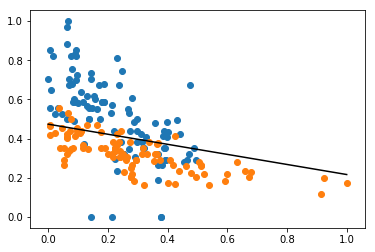

In [51]:
plot_decision_boundary(2.2931772931676204, 8.933654419980822, -4.234596589892856)
plot_data(car_actual_data)

In [59]:
xs = [
    bmws[1][3:5],
    bmws[2][3:5],
    priuses[1][3:5],
    bmws[3][3:5],
    priuses[2][3:5],
]
for x in xs:
    print(x)

(110890.0, 13995.0)
(94133.0, 13982.0)
(70000.0, 9900.0)
(46778.0, 14599.0)
(84507.0, 14998.0)


In [62]:
(a,b,c) = (2.2931772931676204, 8.933654419980822, -4.234596589892856)

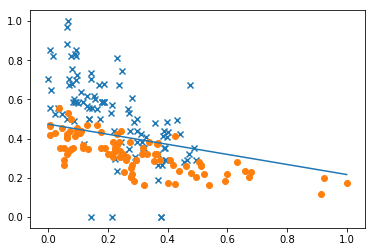

In [65]:
plot_function(lambda x: (-c - a*x) / b,0,1)
plot_data(car_actual_data)

In [66]:
def test_classifier(classifier, data):
    trues = 0
    falses = 0
    for mileage, price, is_bmw in data:
        if classifier(mileage, price) == is_bmw:
            trues += 1
        else:
            falses += 1
    return trues / (trues + falses)

In [68]:
test_classifier(lambda x,p: p > (-c - a*x) / b, car_actual_data)

0.815

In [69]:
-c

4.234596589892856

In [70]:
-a

-2.2931772931676204